# Scientific Calculations with Scipy

In [1]:
import numpy as np

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

## IO

In [3]:
import scipy.io

In [4]:
x = np.random.rand(3,3)
x

array([[ 0.11912571,  0.33709075,  0.49781889],
       [ 0.66384206,  0.52132319,  0.59188931],
       [ 0.3923676 ,  0.0607268 ,  0.02592204]])

In [5]:
scipy.io.savemat('../io/rand2D.mat', {'x':x})

In [6]:
data = scipy.io.loadmat('../io/rand2D.mat')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar 15 11:34:21 2018',
 '__version__': '1.0',
 'x': array([[ 0.11912571,  0.33709075,  0.49781889],
        [ 0.66384206,  0.52132319,  0.59188931],
        [ 0.3923676 ,  0.0607268 ,  0.02592204]])}

In [7]:
data['x']

array([[ 0.11912571,  0.33709075,  0.49781889],
       [ 0.66384206,  0.52132319,  0.59188931],
       [ 0.3923676 ,  0.0607268 ,  0.02592204]])

Warning: Python/Matlab mismatches, Matlab does not represent 1D arrays.

In [8]:
y = np.random.rand(10,)
y

array([ 0.47600018,  0.45833043,  0.22518416,  0.68243101,  0.34505748,
        0.54711828,  0.07920468,  0.27359382,  0.68640981,  0.80846082])

In [9]:
y.shape

(10,)

In [10]:
scipy.io.savemat('../io/rand1D.mat', {'y':y})
data = scipy.io.loadmat('../io/rand1D.mat')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar 15 11:34:23 2018',
 '__version__': '1.0',
 'y': array([[ 0.47600018,  0.45833043,  0.22518416,  0.68243101,  0.34505748,
          0.54711828,  0.07920468,  0.27359382,  0.68640981,  0.80846082]])}

In [11]:
data['y'].shape

(1, 10)

## Linear Algebra

The scipy.linalg module provides standard linear algebra operations, relying on an underlying effi- cient implementation (BLAS, LAPACK).

In [12]:
import scipy.linalg

In [13]:
x = np.array([[1,2],[3,4]])
x

array([[1, 2],
       [3, 4]])

In [14]:
scipy.linalg.det(x)

-2.0

In [15]:
scipy.linalg.inv(x)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [16]:
np.linalg.inv(x)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [20]:
scipy.linalg.svd(x)

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([ 5.4649857 ,  0.36596619]),
 array([[-0.57604844, -0.81741556],
        [ 0.81741556, -0.57604844]]))

## Interpolation

scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where
no measure exists. The module is based on the FITPACK Fortran subroutines.

In [24]:
from scipy.interpolate import interp1d

In [30]:
measured_time = np.linspace(0 , 1 , 10)
noise = (np.random.random(10)*2 - 1 )*1e-1
measures = np.sin(2*np.pi*measured_time) + noise

<IPython.core.display.Javascript object>


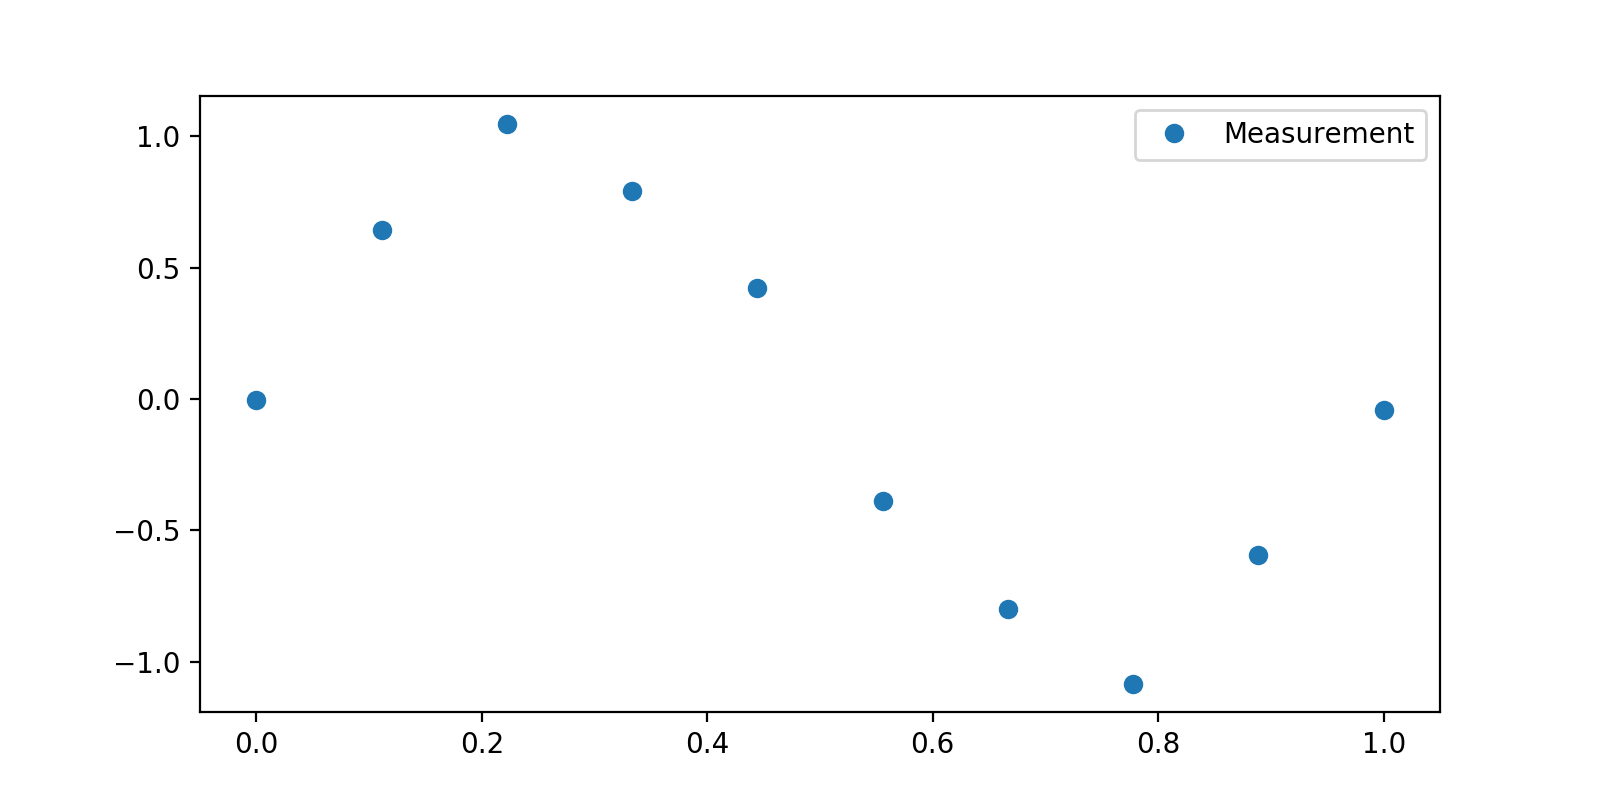

In [31]:
plt.figure(figsize=(8,4))
plt.plot(measured_time, measures, 'o', label='Measurement')
plt.legend(loc='best')

In [32]:
linear_interp = interp1d(measured_time, measures)

computed_time = np.linspace(0 , 1 , 50)
linear_results = linear_interp(computed_time)

In [33]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

<IPython.core.display.Javascript object>


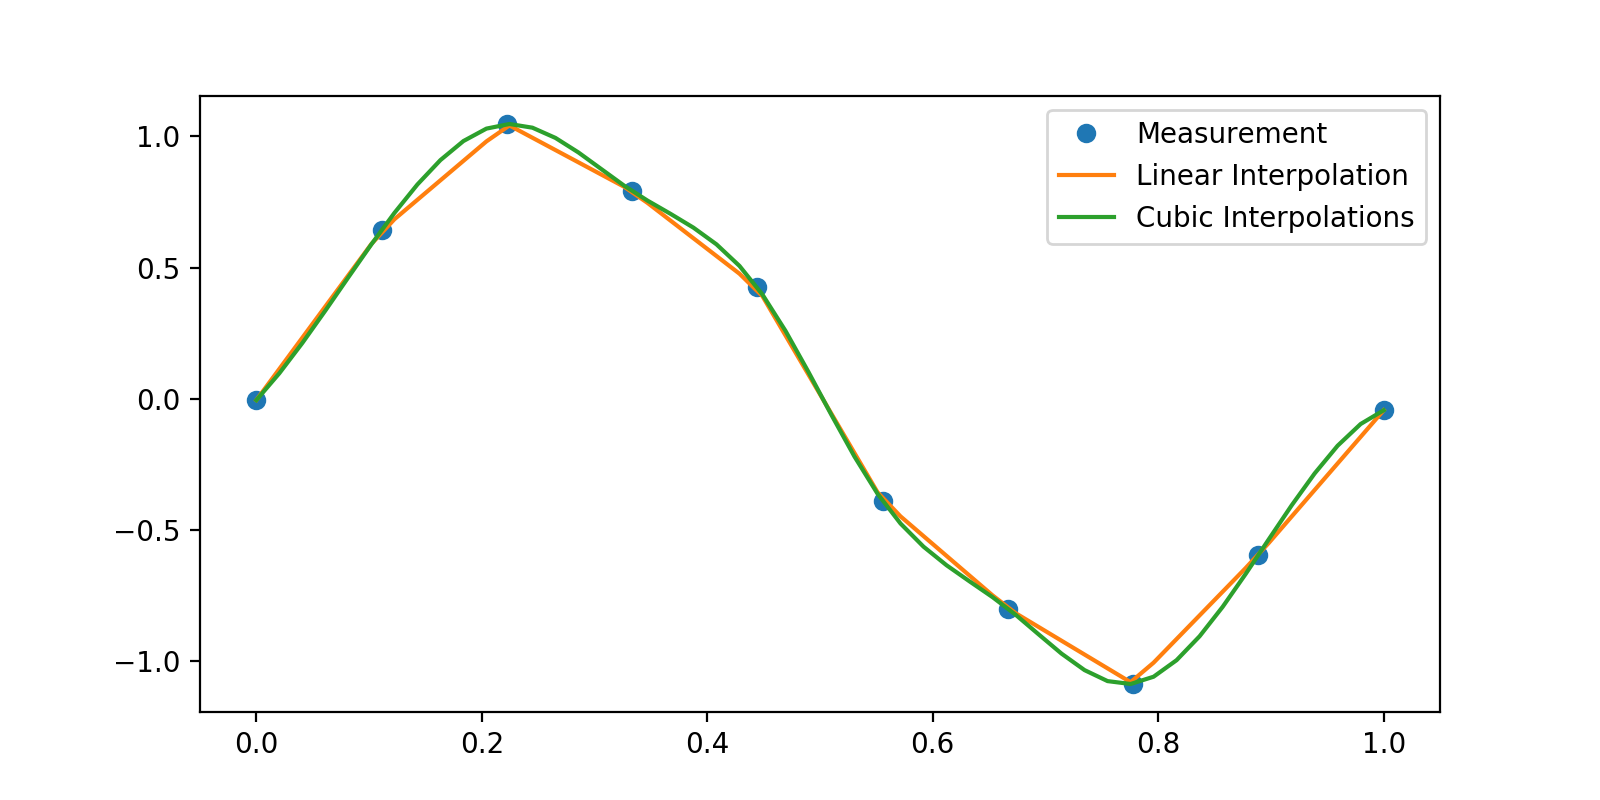

In [35]:
plt.figure(figsize=(8,4))
plt.plot(measured_time, measures, 'o', label='Measurement')
plt.plot(computed_time, linear_results, label='Linear Interpolation', linewidth=1.5)
plt.plot(computed_time, cubic_results, label='Cubic Interpolations', linewidth=1.5)
plt.legend(loc='best')

scipy.interpolate.interp2d is similar to scipy.interpolate.interp1d, but for 2-D arrays. Note that for the interp family, the interpolation points must stay within the range of given data points.

#### Example

In [66]:
xfine = np.linspace(0, 10, num=110, endpoint=True)
yfine = np.cos(-xfine**2/9.0)

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
np.save('../io/data_interpolate.npy', np.vstack([x,y]).T)

In [83]:
data = np.load('../io/data_interpolate.npy')
data.shape

(11, 2)

In [84]:
x,y = data.T

<IPython.core.display.Javascript object>


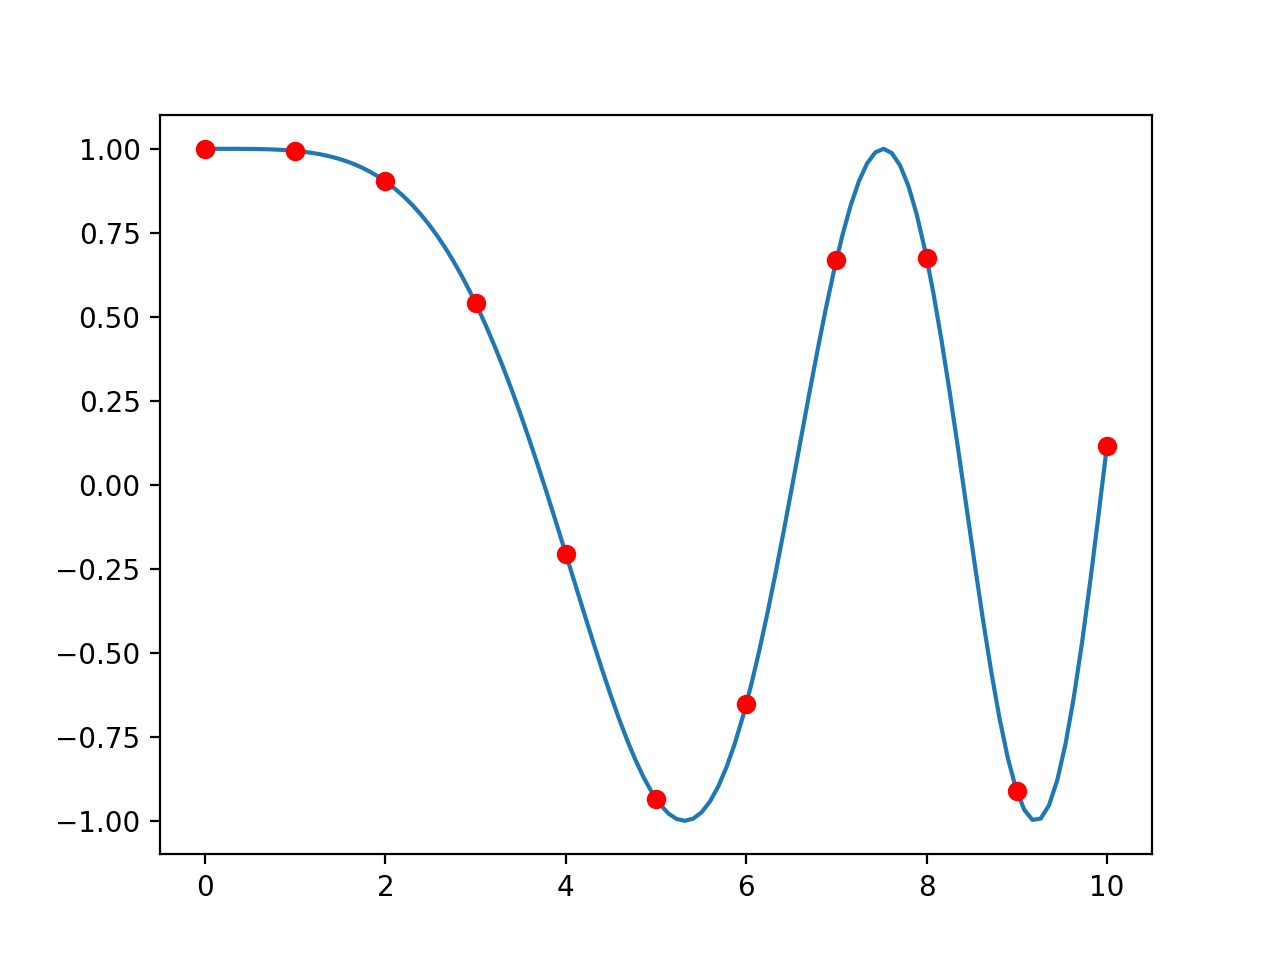

In [85]:
plt.figure()
plt.plot(xfine, yfine)
plt.plot(x, y, 'or')
plt.show()

In [90]:
f_linear = interp1d(x, y)
f_cubic = interp1d(x, y, kind='cubic')

<IPython.core.display.Javascript object>


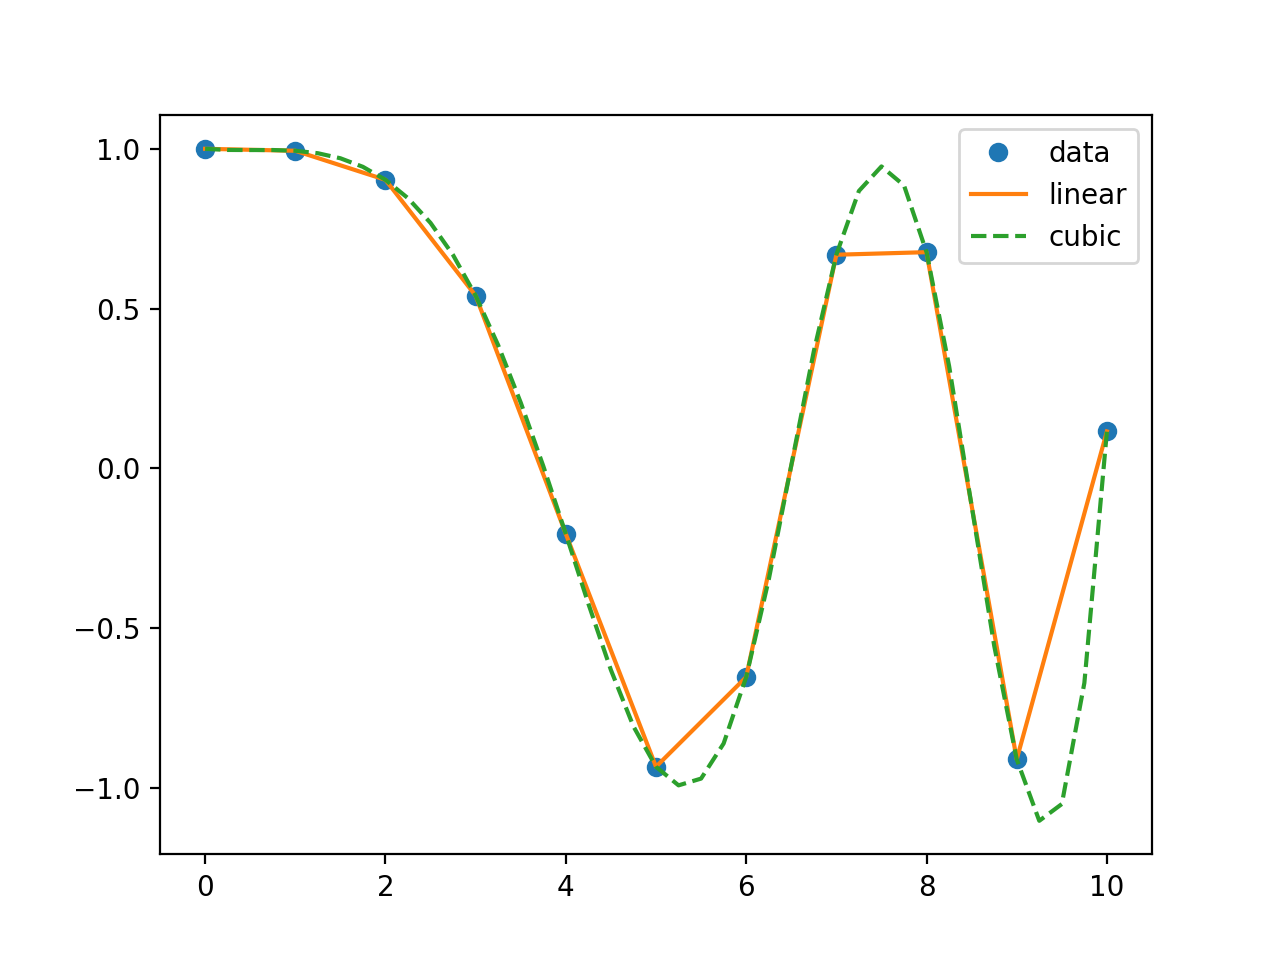

In [89]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xnew, f_linear(xnew), '-')
plt.plot(xnew, f_cubic(xnew), '--')

plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [65]:
p = np.array([7.5])
print('Real:   {:5.2f}'.format(np.cos(-p**2/9.0)[0]))
print('Linear: {:5.2f}'.format(f_linear(p)[0]))
print('Cubic:  {:5.2f}'.format(f_cubic(p)[0]))

Real:    1.00
Linear:  0.67
Cubic:   0.94


## Optimization

Optimization is the problem of finding a numerical solution to a minimization or equality.

Tip: The scipy.optimize module provides algorithms for function minimization (scalar or multi- dimensional), curve fitting and root finding.

In [86]:
import scipy.optimize

### Finding the minimum of a scalar function

In [91]:
def f(x):
    return x ** 2 + 10* np.sin(x)

<IPython.core.display.Javascript object>


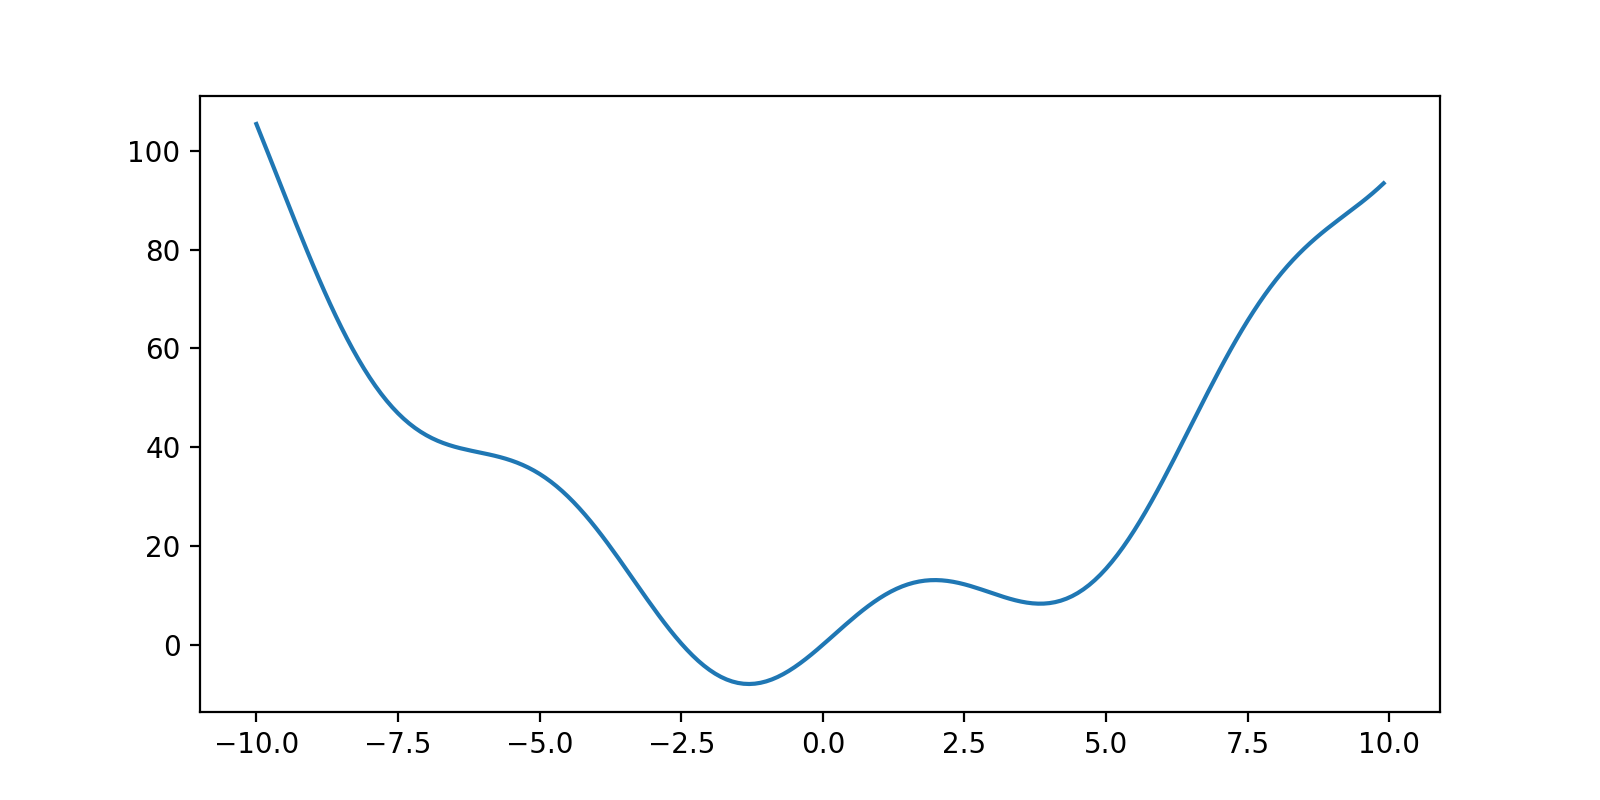

In [92]:
x = np.arange(-10, 10, 0.1)

plt.figure(figsize=(8,4))
plt.plot(x, f(x))
plt.show()

#### Local optimization

In [44]:
scipy.optimize.minimize(f, x0=0)

      fun: -7.945823375615215
 hess_inv: array([[ 0.08589237]])
      jac: array([ -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [46]:
scipy.optimize.minimize(f, x0=0, method="L-BFGS-B")

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.50990331e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644014])

In [45]:
scipy.optimize.minimize(f, x0=3)

      fun: 8.315585579477458
 hess_inv: array([[ 0.11886955]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 3.83746709])

#### Global optimization

In [41]:
# ensure global minimum with basin-hopping
scipy.optimize.basinhopping(f, 0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08581682]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1527
                        nit: 100
                       njev: 509
                          x: array([-1.30644001])

In [49]:
# constraints
result = scipy.optimize.minimize(f, x0=1, bounds=((0,10),))
result

      fun: array([ 0.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 10.00000001])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([ 0.])

#### Finding the roots of a scalar function

In [50]:
scipy.optimize.root(f, x0=1)

    fjac: array([[-1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([ 0.])

In [53]:
scipy.optimize.fsolve(f, x0=-3)  # our initial guess is 1

array([-2.47948183])

### Curve  fitting

In [54]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [68]:
def func(x,a,b):
    return a * np.sin(b * x)

In [69]:
params, params_covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0=[2, 2])

In [70]:
params

array([ 3.28920142,  1.48650786])

In [82]:
x = np.linspace(-5, 5, num=200)

<IPython.core.display.Javascript object>


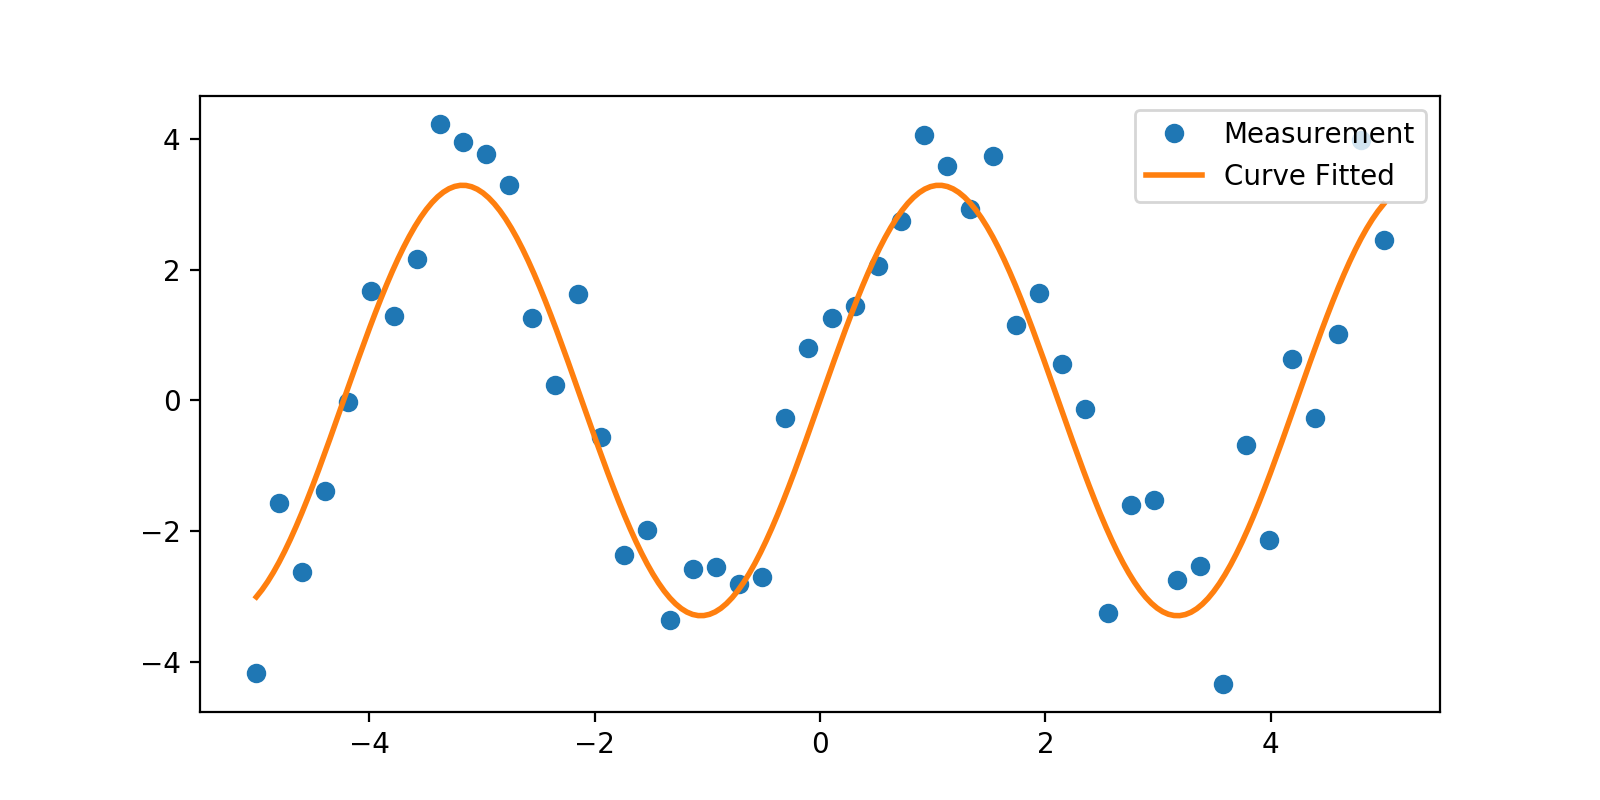

In [83]:
plt.figure(figsize=(8,4))
plt.plot(x_data, y_data, 'o', label='Measurement')
plt.plot(x, func(x,*params), label='Curve Fitted', linewidth=2)
plt.legend(loc='best')

#### Example

In [307]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

x_fine = np.linspace(-5, 5, num=200)
y_fine = 2.9 * np.sin(1.5 * x_fine)

<IPython.core.display.Javascript object>


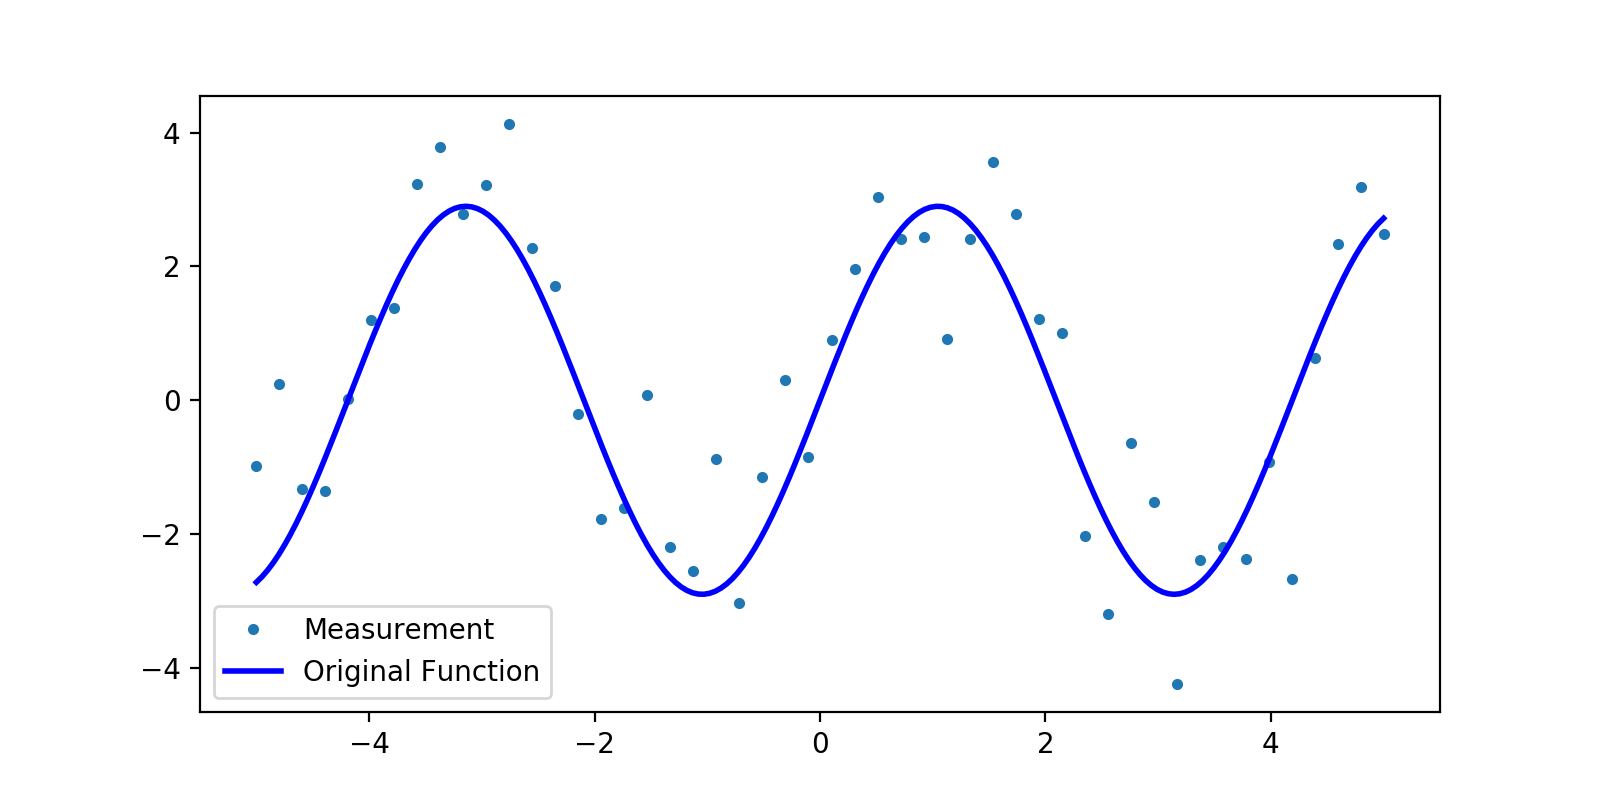

In [351]:
plt.figure(figsize=(8,4))
plt.plot(x_data, y_data, '.', label='Measurement')
plt.plot(x_fine, y_fine, label='Original Function', linewidth=2, color='b')
plt.legend(loc='best')

In [352]:
def func_poly(x, *params):
    y = 0
    for i,p in enumerate(params):
        y += p*x**i
    return y

In [374]:
initial = [1]*10
poly_params, _ = scipy.optimize.curve_fit(poly_func, x_data, y_data, p0=initial)

y_poly = func_poly(x_fine,*poly_params)
error_poly = np.sum((y_fine - y_poly)**2)
print(error_poly)

52.969470414


In [375]:
for i,p in enumerate(poly_params):
    print('{:5.2f}*x^{}'.format(p,i))

 0.38*x^0
 3.58*x^1
 0.02*x^2
-1.20*x^3
-0.00*x^4
 0.10*x^5
-0.00*x^6
-0.00*x^7
 0.00*x^8
 0.00*x^9


<IPython.core.display.Javascript object>


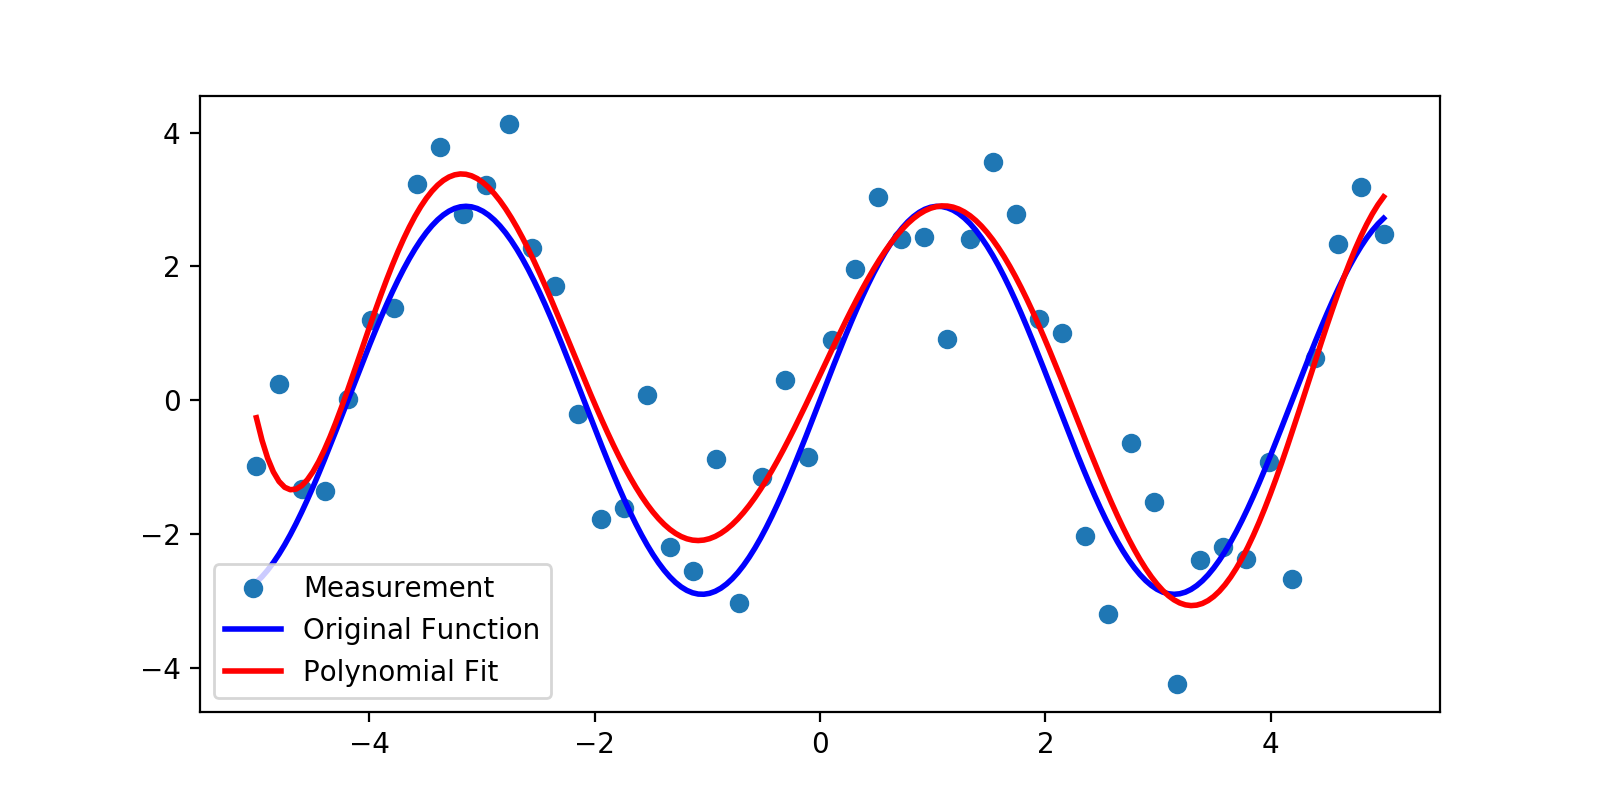

In [376]:
plt.figure(figsize=(8,4))
plt.plot(x_data, y_data, 'o', label='Measurement')
plt.plot(x_fine, y_fine, label='Original Function', linewidth=2, color='b')
plt.plot(x_fine, y_poly, label='Polynomial Fit', linewidth=2, color='r')
plt.legend(loc='best')

In [377]:
def func_fourier(x, *params):
    params = np.array(params).reshape((-1,2))
    y = 0
    for i,row in enumerate(params):
        y += row[0]*np.sin(i*np.pi/4*x) + row[1]*np.cos(i*np.pi/4*x)
    return y

In [388]:
initial = [(1,1)]*3
fourier_params, _ = scipy.optimize.curve_fit(fourier_func, x_data, y_data, p0=initial)
y_fourier = func_fourier(x_fine,*fourier_params)
error_fourier = np.sum((y_fine - y_fourier)**2)
print(error_fourier)

57.6636834384


/Users/bdsaglam/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [389]:
for i,row in enumerate(np.array(fourier_params).reshape((-1,2))):
    print('{:5.2f} * sin({}*pi/4*x) + {:5.2f} * cos({}*pi/4*x)'.format(row[0],i, row[1], i))

 1.00 * sin(0*pi/4*x) +  0.35 * cos(0*pi/4*x)
 0.15 * sin(1*pi/4*x) +  0.12 * cos(1*pi/4*x)
 2.58 * sin(2*pi/4*x) + -0.14 * cos(2*pi/4*x)


<IPython.core.display.Javascript object>


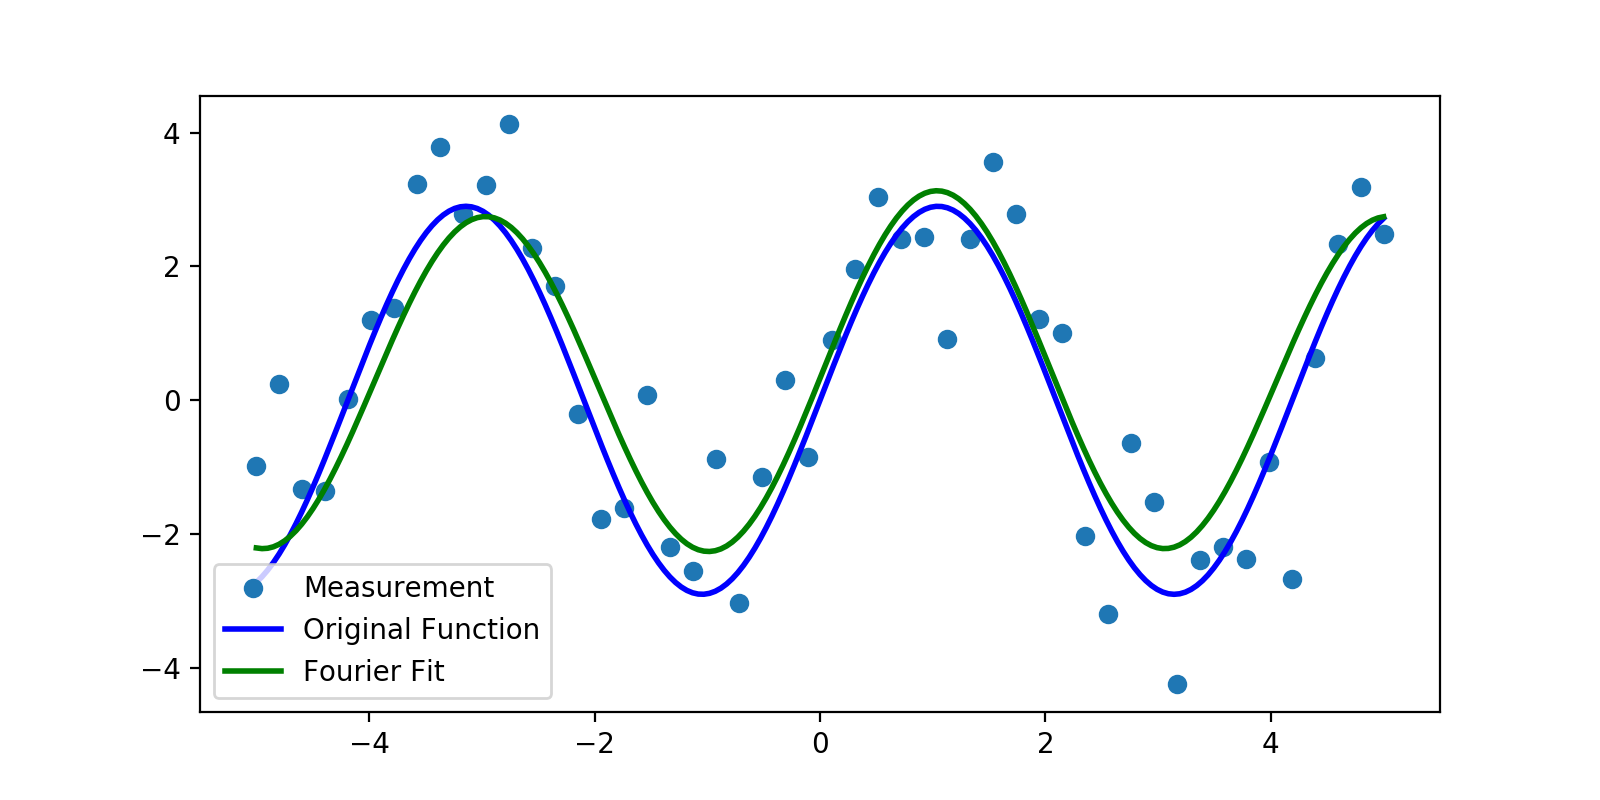

In [390]:
plt.figure(figsize=(8,4))
plt.plot(x_data, y_data, 'o', label='Measurement')
plt.plot(xfine, yfine, label='Original Function', linewidth=2, color='b')
plt.plot(xfine, y_fourier, label='Fourier Fit', linewidth=2, color='g')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


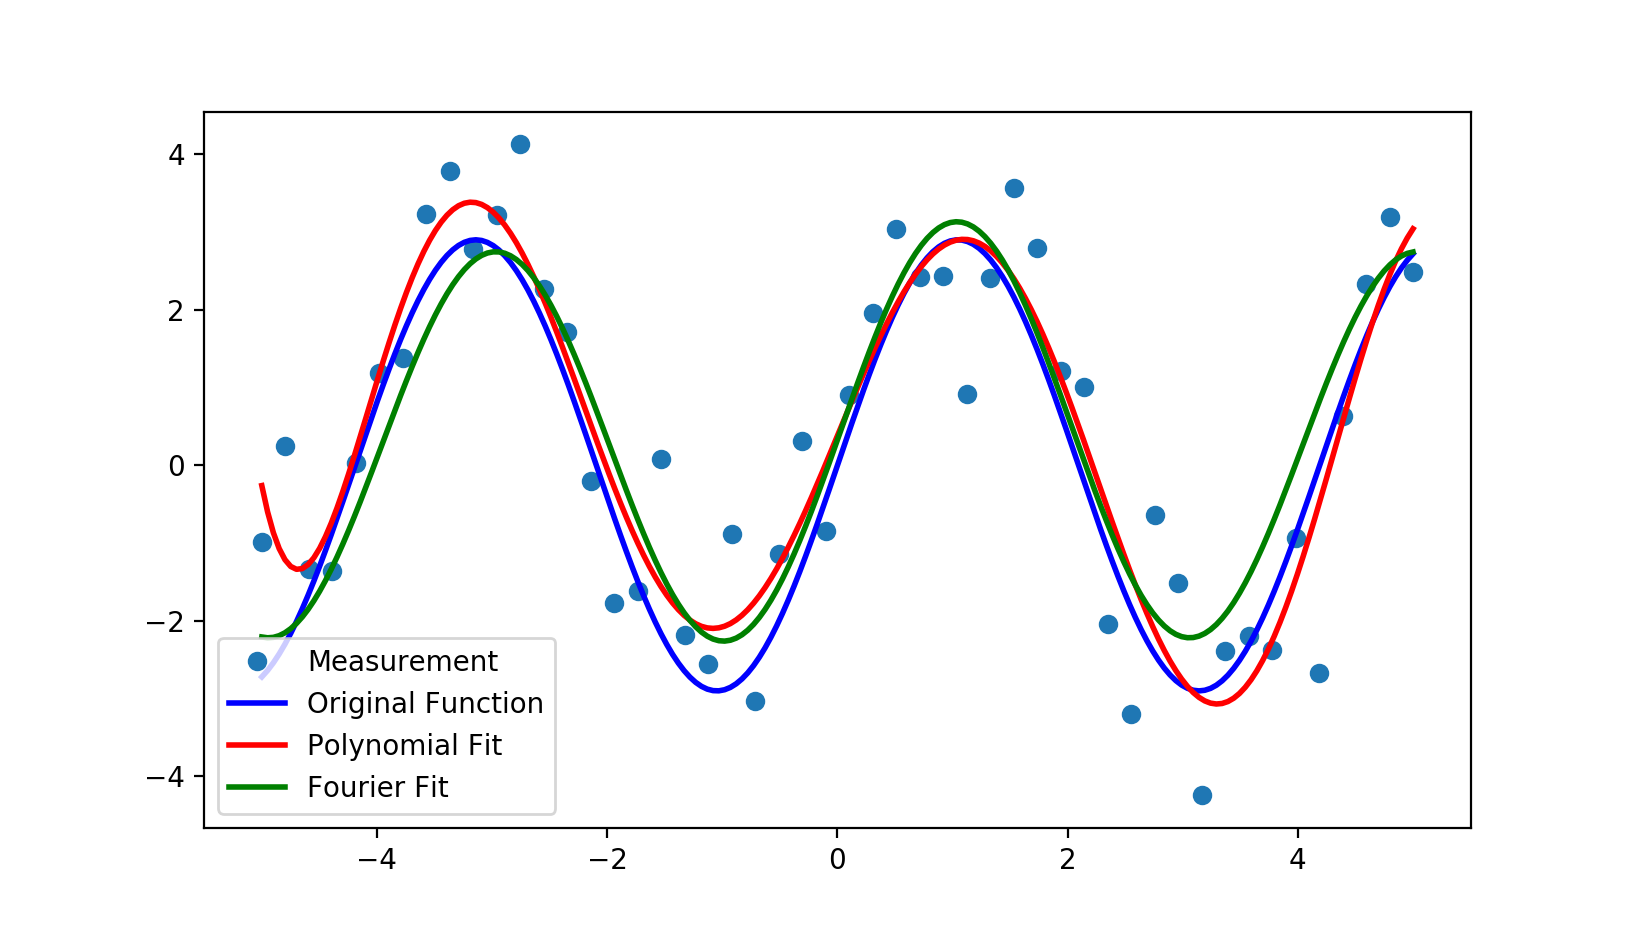

In [391]:
plt.figure(figsize=(8,4))
plt.plot(x_data, y_data, 'o', label='Measurement')
plt.plot(xfine, yfine, label='Original Function', linewidth=2, color='b')
plt.plot(x_fine, y_poly, label='Polynomial Fit', linewidth=2, color='r')
plt.plot(x_fine, y_fourier, label='Fourier Fit', linewidth=2, color='g')
plt.legend(loc='best')

## Statistics and random numbers

The module scipy.stats contains statistical tools and probabilistic descriptions of random processes. Ran-
dom number generators for various random process can be found in numpy.random.

In [84]:
import scipy.stats

#### Distributions: histogram and probability density function

In [123]:
samples = np.random.normal(0, 1, size=1000)
bins = np.arange(-4, 5, 0.2)

histogram = np.histogram(samples, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])

In [124]:
pdf = scipy.stats.norm.pdf(bins) # norm is a distribution object

<IPython.core.display.Javascript object>


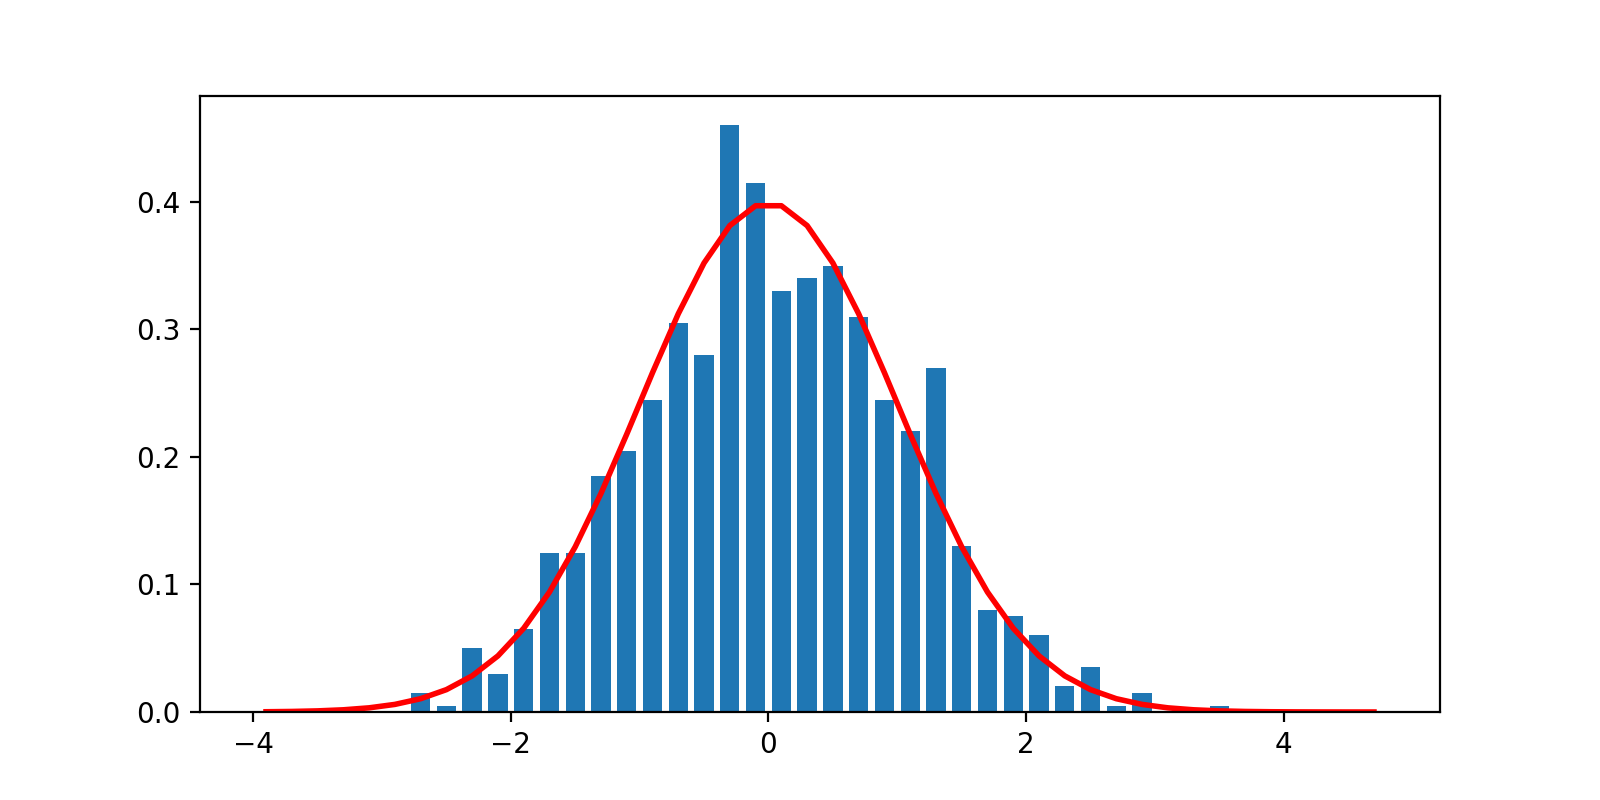

In [125]:
plt.figure(figsize=(8,4))
plt.bar(bins, histogram, width=0.15)
plt.plot(bins, pdf, linewidth=2, color='red')

In [127]:
loc, std = scipy.stats.norm.fit(samples)
loc, std

(0.035933044488357671, 1.0243724646973791)

In [130]:
np.mean(samples)

0.035933044488357671

In [131]:
np.median(samples)

-0.0043150100858516975

In [135]:
# the value that 50% of population is below, i.e. median
scipy.stats.scoreatpercentile(samples, 50)

-0.0043150100858516975

In [134]:
# the value that 90% of population is below
scipy.stats.scoreatpercentile(samples, 90)

1.3496030353087056

## Integrate

In [ ]:
from scipy.integrate import quad

#### Function integrals

In [ ]:
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res,1)

#### Integrating differential equations

In [136]:
from scipy.integrate import odeint

dy/dt = rhs(y1, y2, .., t0,...)

In [137]:
odeint?

In [139]:
# dy/dt = -2y
def calc_derivative(y, time):
    return - 2 * y

In [142]:
time_vec = np.linspace(0, 4, 40)
y_vec = odeint(calc_derivative, y0=1, t=time_vec)

<IPython.core.display.Javascript object>


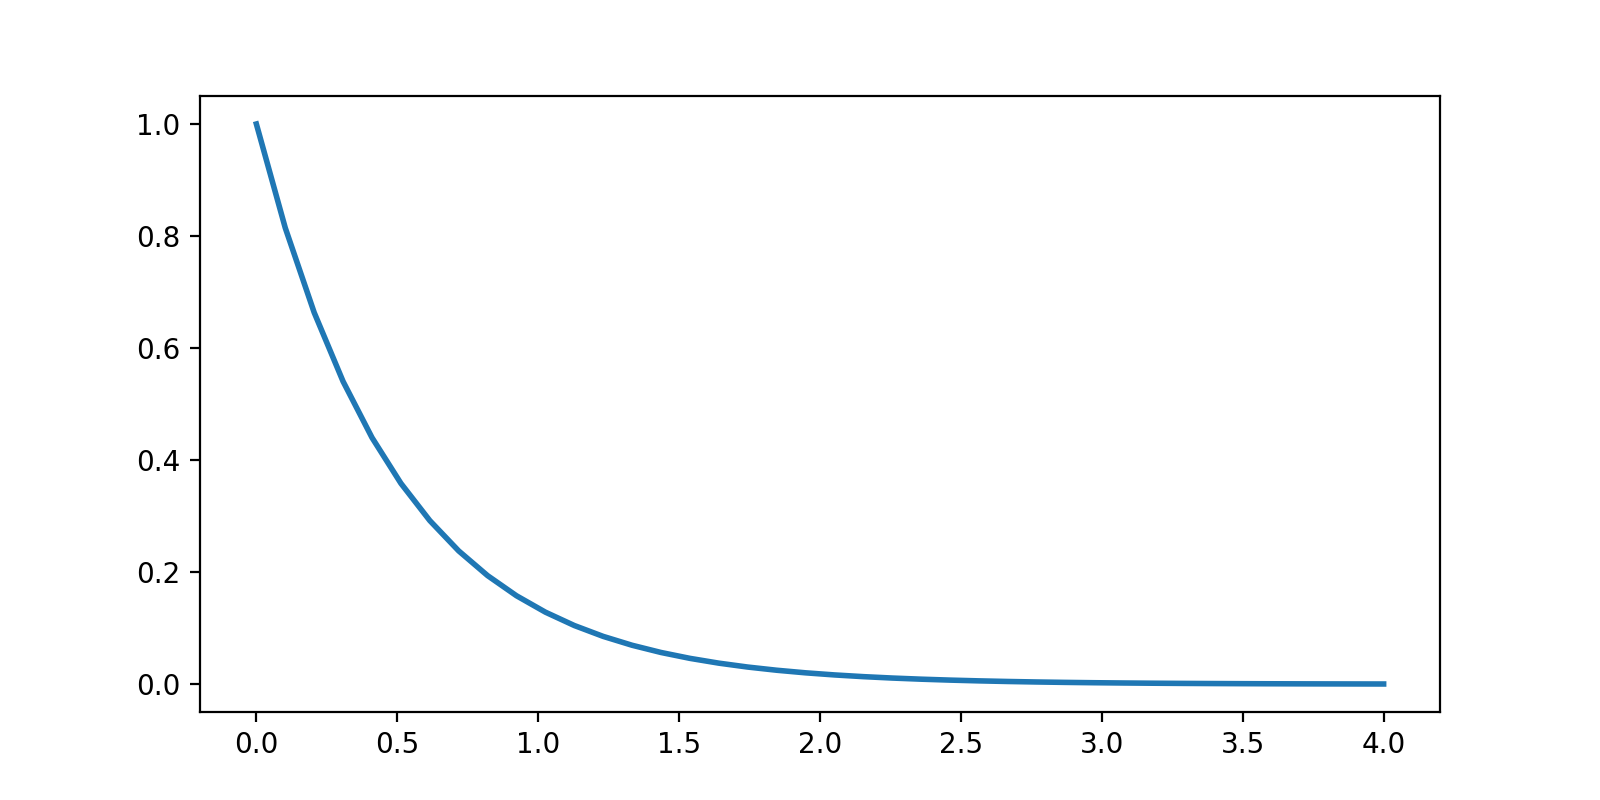

In [143]:
plt.figure(figsize=(8,4))
plt.plot(time_vec, y_vec, linewidth=2)

In [144]:
# SDOF Free vibration system
# m*ddy/ddt + c*dy/dt + k*y = 0
# y'' + 2*zeta*wn*y' + wn**2*y = 0

In [150]:
# takes Y=(y,y') and returns (y',y'')
def calc_derivative(yvec, time, zeta, wn):
    return (yvec[1], -zeta*wn*yvec[1] - wn**2*yvec[0])

In [171]:
m = 1 # kg
k = 16 # N/m
c = 2 # N s/m

In [172]:
wn = np.sqrt(k/m)
zeta = c/(2*m*wn)

print(wn, zeta)

4.0 0.25


In [181]:
time_vec = np.linspace(0, 10, 1000)
yinit = (1, 0)

y_array = odeint(calc_derivative, yinit, time_vec, args=(zeta, wn))

In [182]:
time_vec.shape

(1000,)

In [183]:
y_array.shape

(1000, 2)

<IPython.core.display.Javascript object>


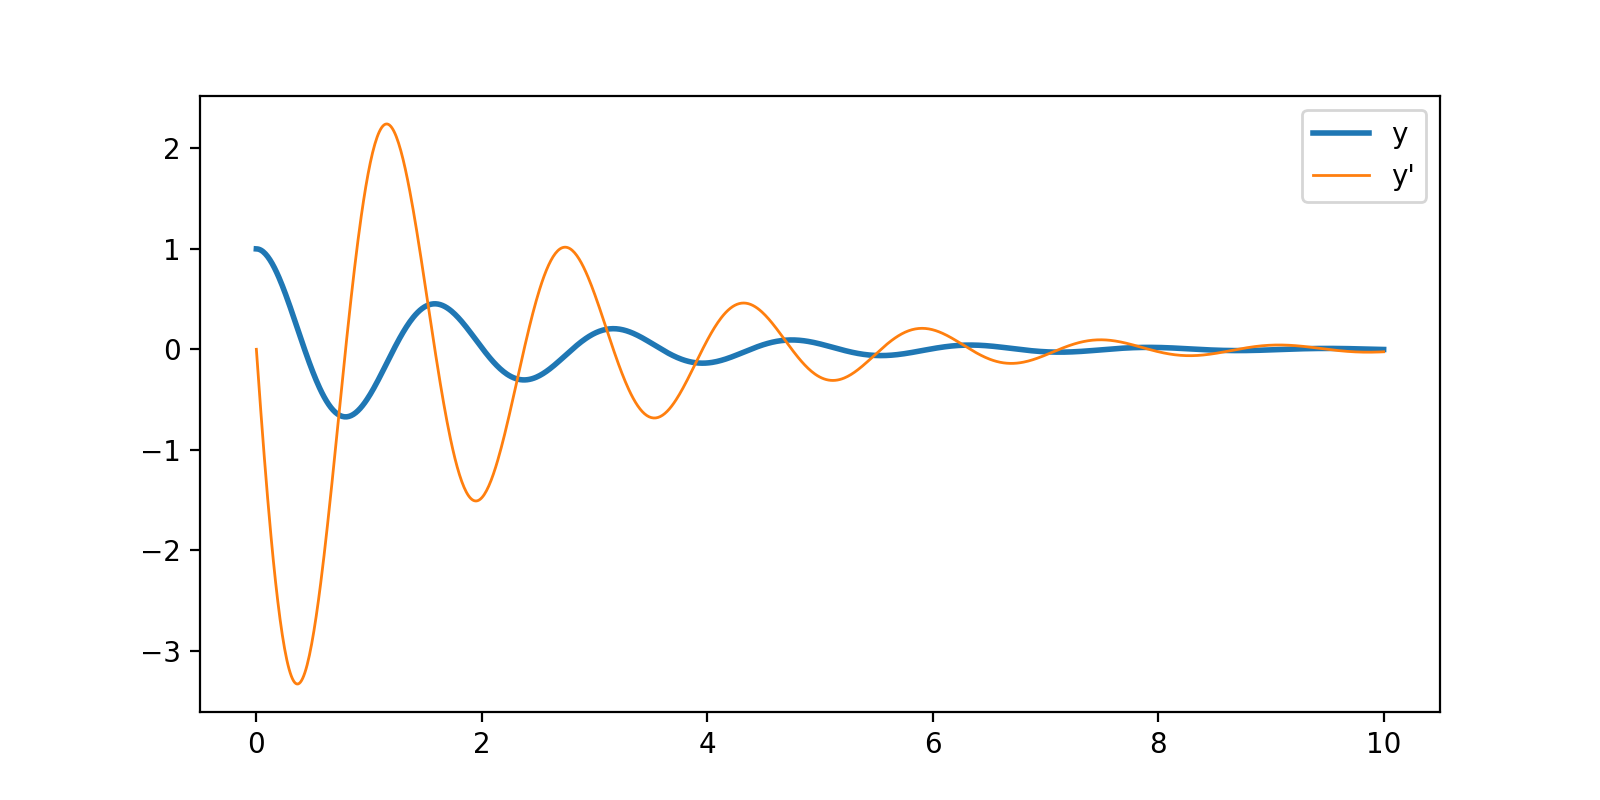

In [186]:
plt.figure(figsize=(8,4))
plt.plot(time_vec, y_array[:,0], label='y', linewidth=2)
plt.plot(time_vec, y_array[:,1], label="y'", linewidth=1)
plt.legend(loc='best')
plt.xlim([0,10])

### Fast Fourier Transform

In [113]:
from scipy import fftpack

In [114]:
fs = 1000
f_source = 10
t = np.arange(0, 2, 1/fs)
sig = np.sin(2*np.pi*f_source*t) + 0.5*np.random.randn(t.size)
N = t.size

<IPython.core.display.Javascript object>


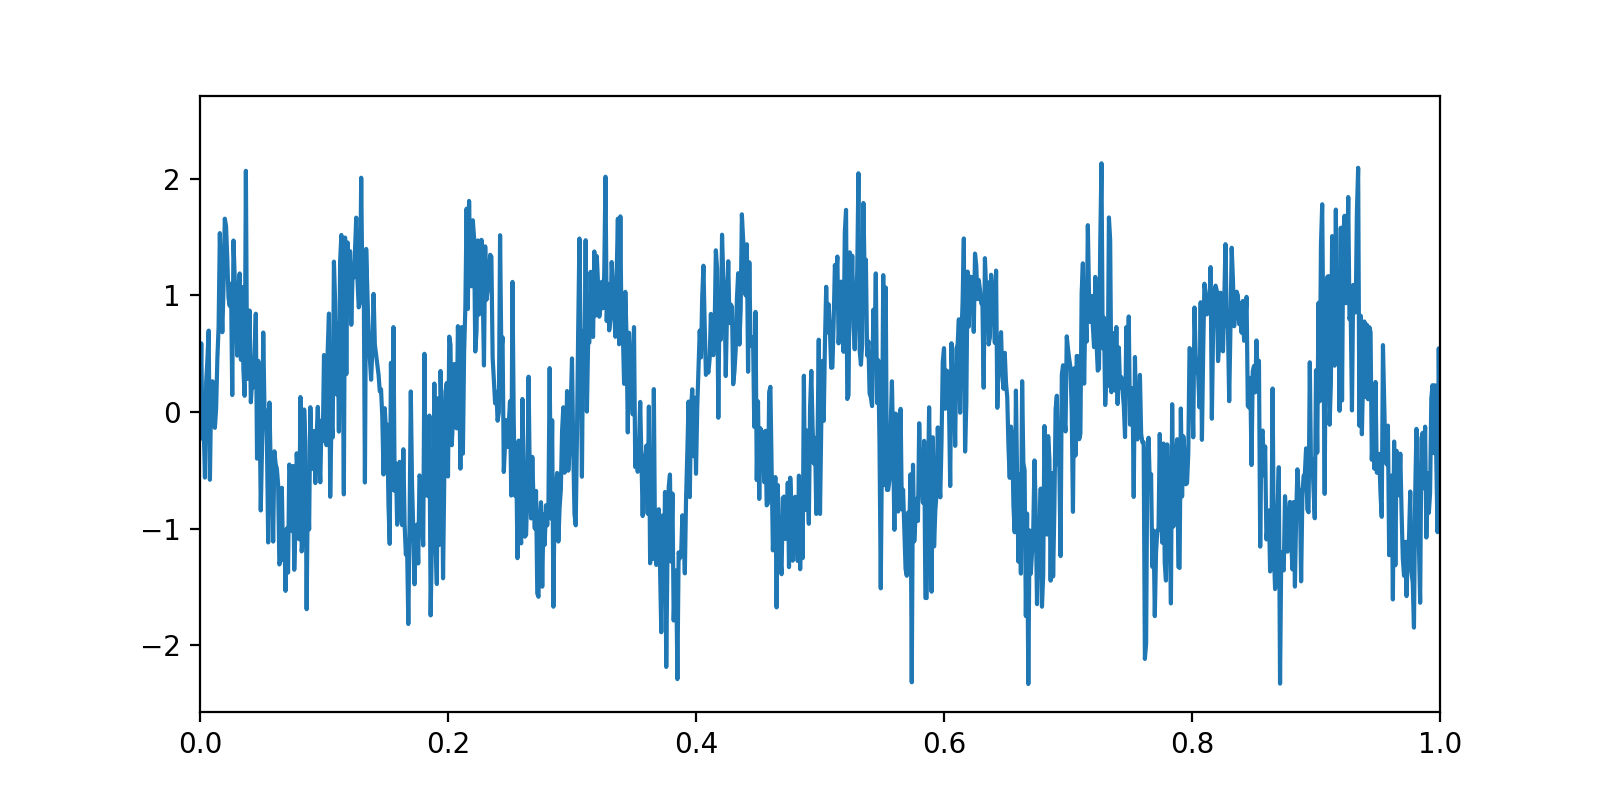

(0, 1)

In [115]:
plt.figure(figsize=(8,4))
plt.plot(t, sig)
plt.xlim([0,1])

In [118]:
sig_fft = fftpack.fft(sig)
freqs = fftpack.fftfreq(sig.size, d=time_step)

In [119]:
freqs

array([ 0. ,  0.5,  1. , ..., -1.5, -1. , -0.5])

<IPython.core.display.Javascript object>


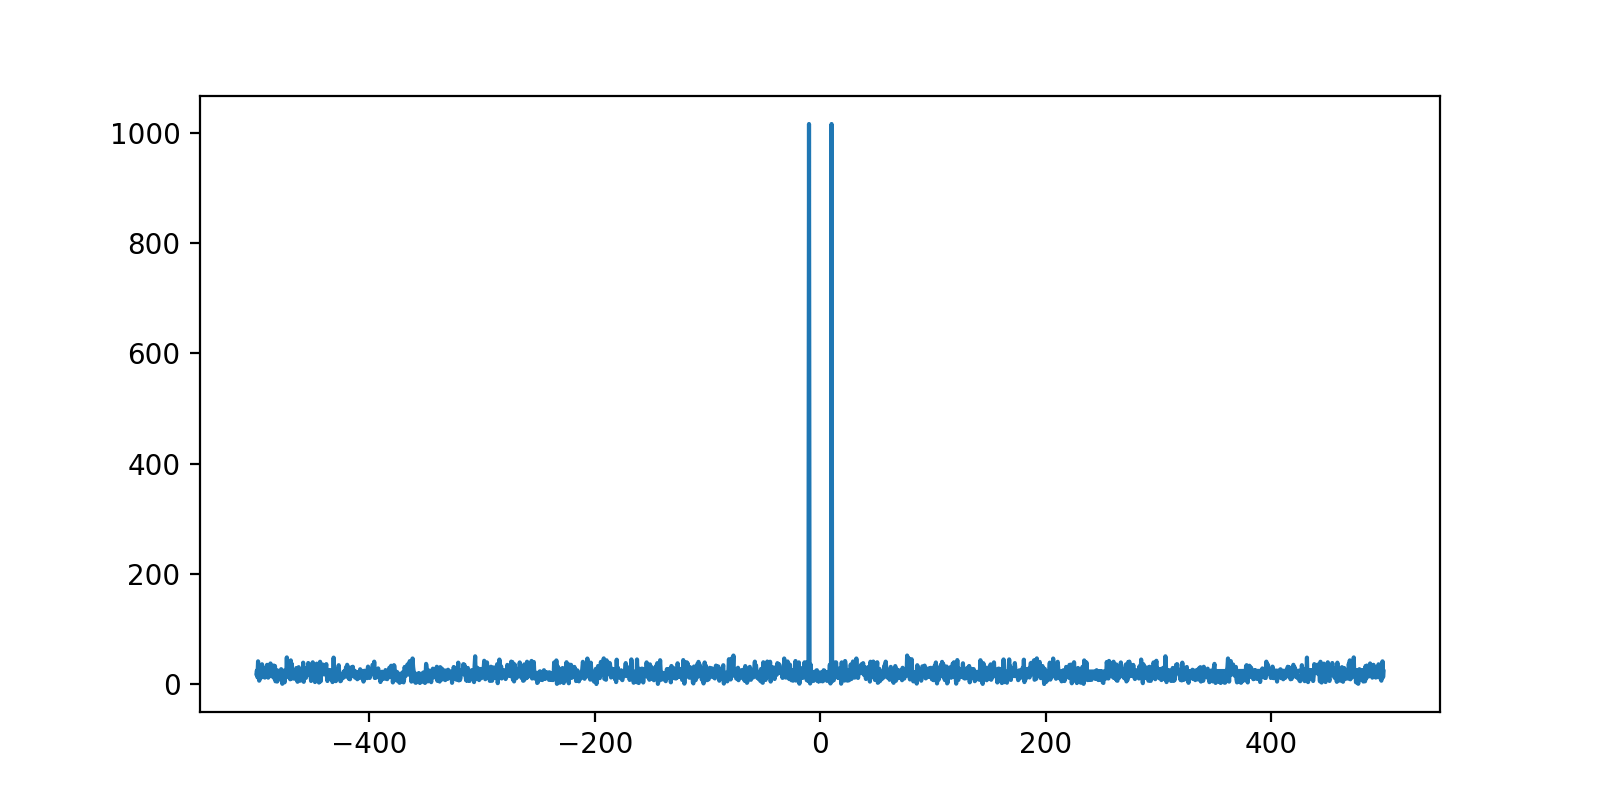

In [120]:
plt.figure(figsize=(8,4))
plt.plot(freqs, np.absolute(sig_fft))

In [121]:
psd = np.abs(2*sig_fft[:N//2])

<IPython.core.display.Javascript object>


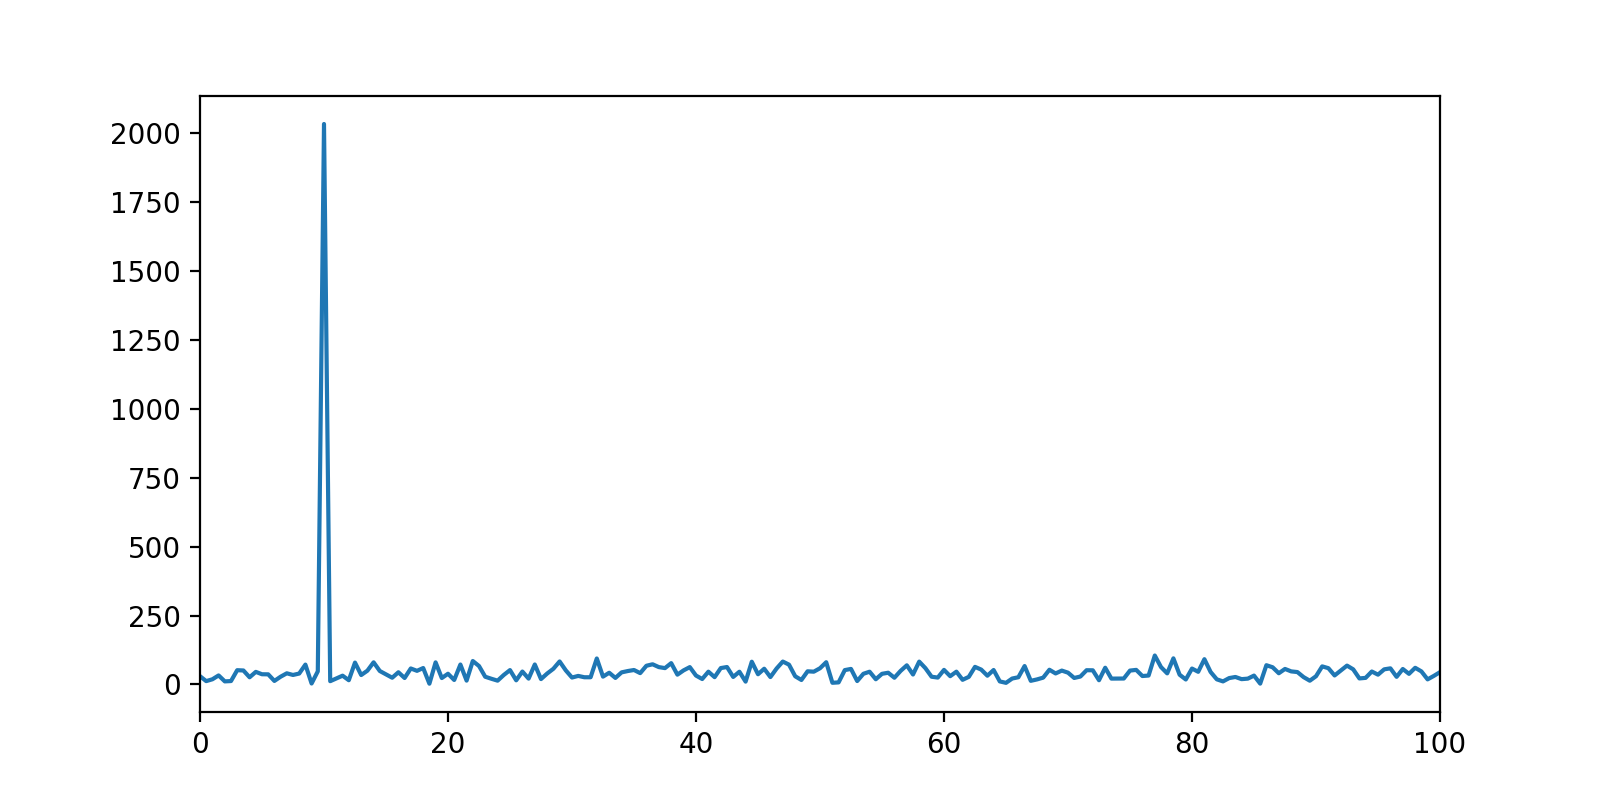

(0, 100)

In [122]:
plt.figure(figsize=(8,4))
plt.plot(freqs[:N//2], psd)
plt.xlim([0,100])

In [123]:
freq = freqs[psd.argmax()]
np.allclose(freq, f_source) # check that correct freq is found

True

In [130]:
sig_fft[np.abs(freqs) > freq] = 0
main_sig = fftpack.ifft(sig_fft).real

In [136]:
fftpack?

<IPython.core.display.Javascript object>


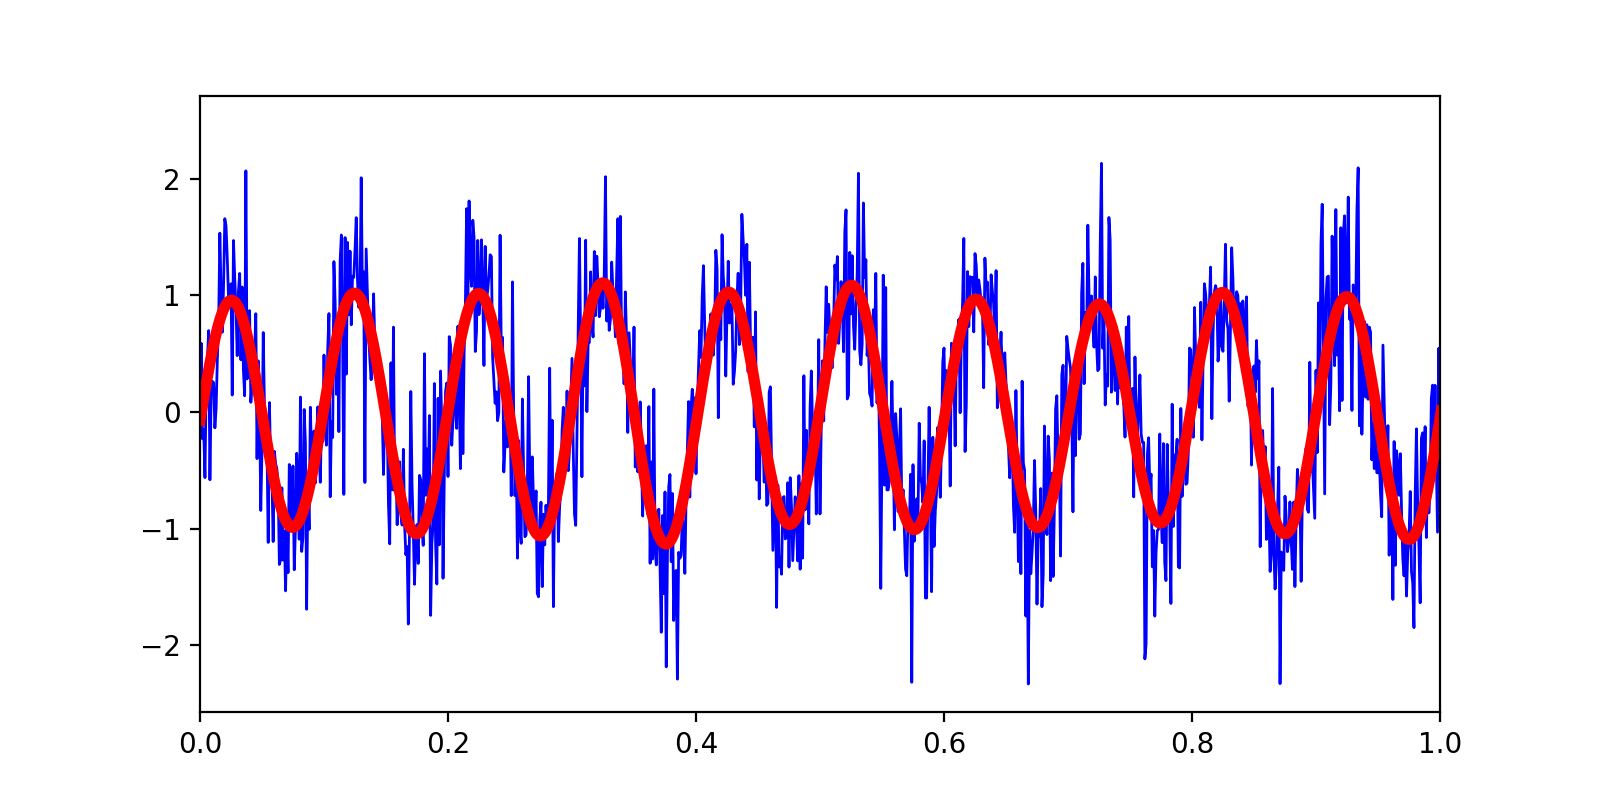

(0, 1)

In [131]:
plt.figure(figsize=(8,4))
plt.plot(t, sig, linewidth=1, color='b')
plt.plot(t, main_sig.real, linewidth=4, color='r')
plt.xlim([0,1])

### Signal

In [3]:
import scipy.signal

scipy.signal.resample( ): resample a signal to n points using FFT.

In [109]:
t = np.linspace(0, 5, 100)
x = np.sin(t)
x_resampled = scipy.signal.resample(x, 25)

<IPython.core.display.Javascript object>


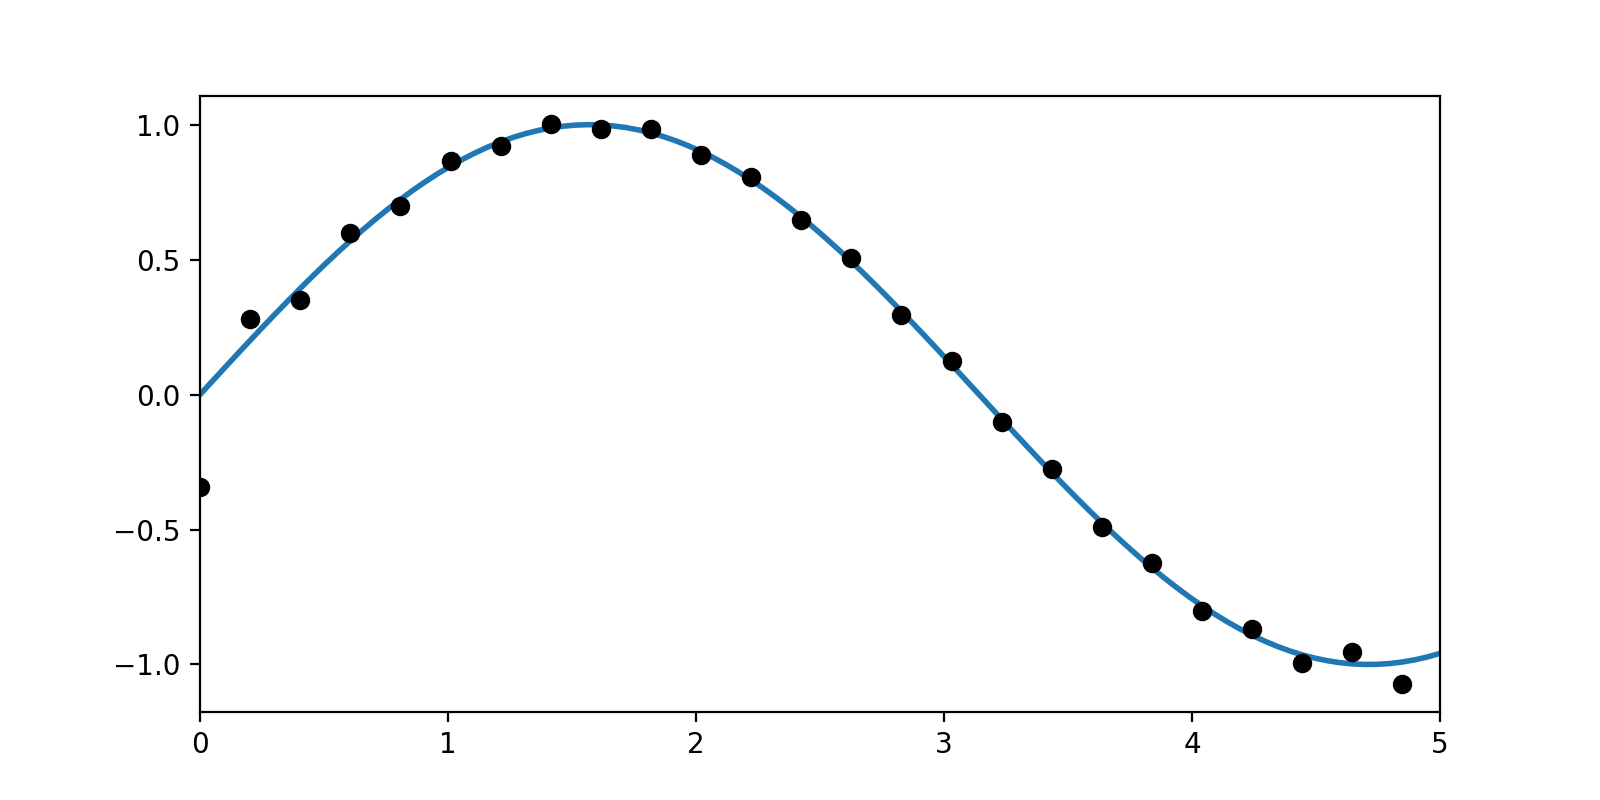

(0, 5)

In [13]:
plt.figure(figsize=(8,4))
plt.plot(t, x, linewidth=2)
plt.plot(t[::4], x_resampled, 'ko')
plt.xlim([0,5])

In [16]:
t = np.linspace(0, 5, 100)
y = t + np.random.normal(size=100)

y_detrended = scipy.signal.detrend(y)

<IPython.core.display.Javascript object>


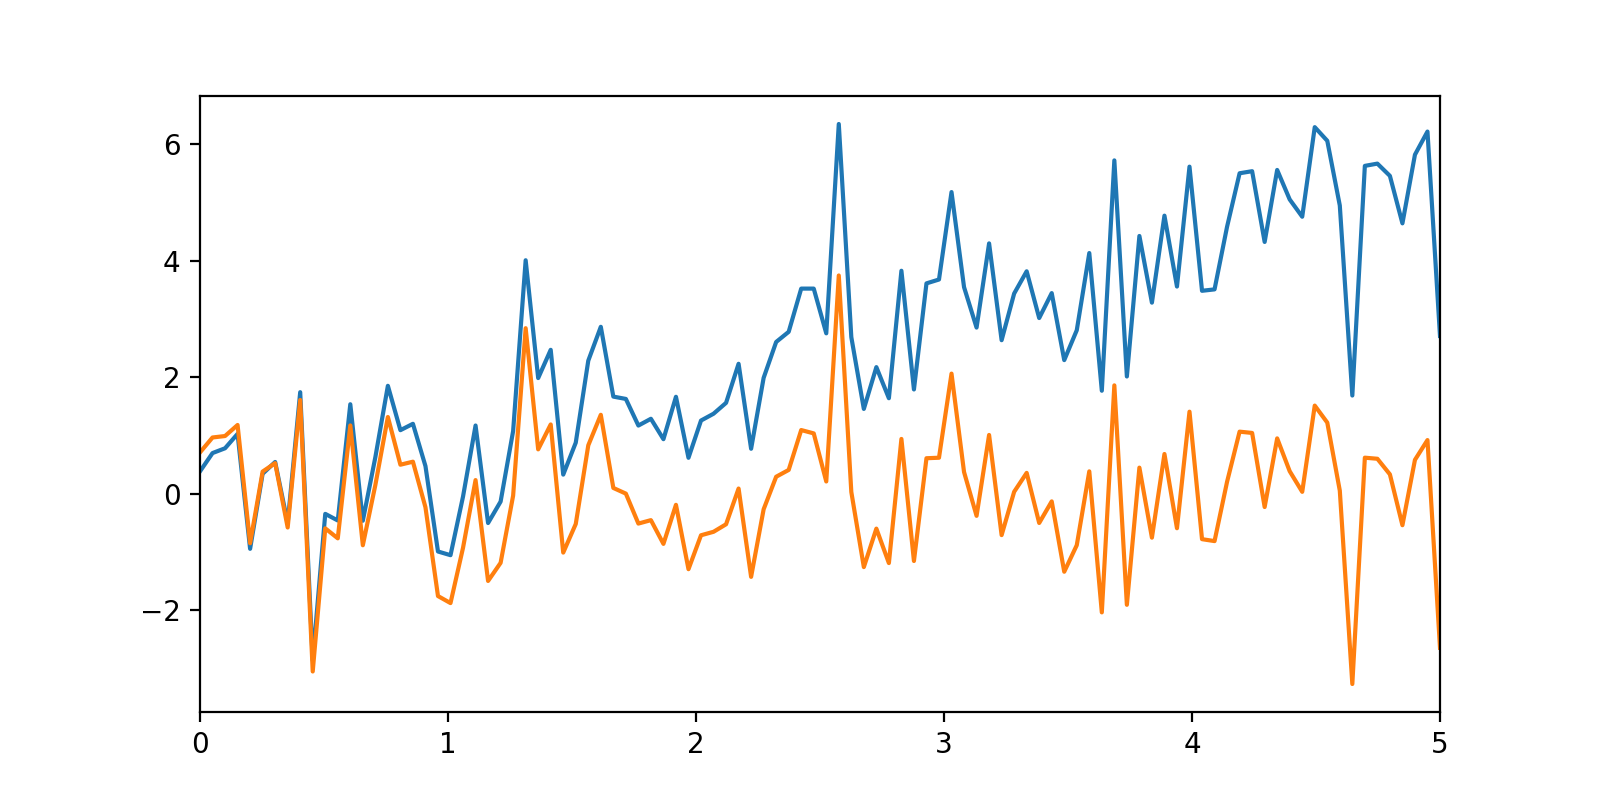

(0, 5)

In [17]:
plt.figure(figsize=(8,4))
plt.plot(t, y)
plt.plot(t, y_detrended)
plt.xlim([0,5])

#### Example

In [284]:
import scipy.io
import scipy.signal

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [285]:
data = scipy.io.loadmat('../io/Truck_Bed_01.mat')

In [295]:
t = data['ADC'][0]

fs = int(1/(t[1]-t[0]))

sig = data['ADC'][2]

In [296]:
fs

5000

<IPython.core.display.Javascript object>


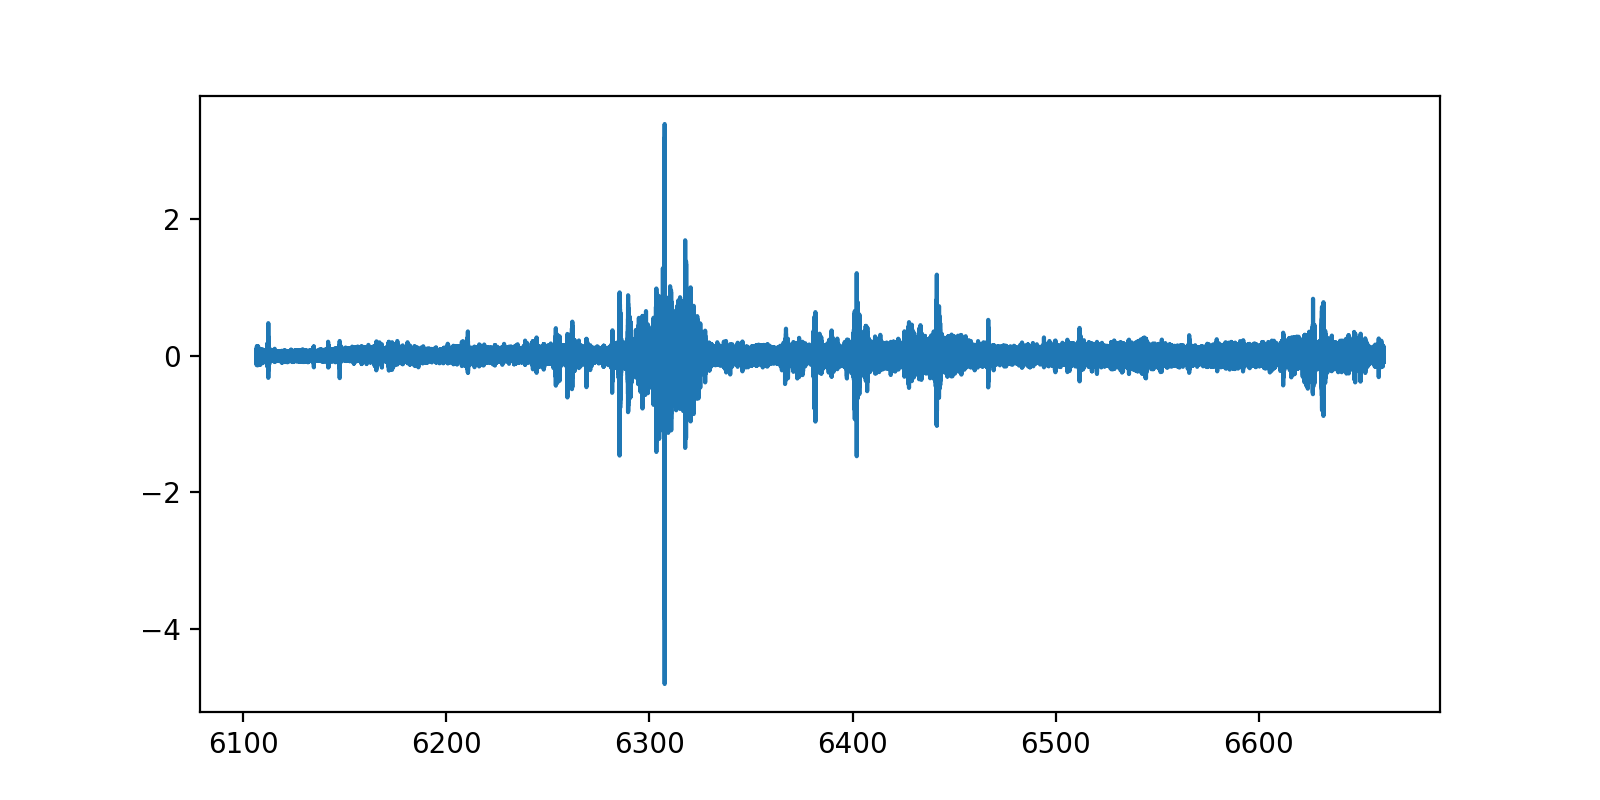

In [297]:
plt.figure(figsize=(8,4))
plt.plot(t, sig)

```python
f, tt, Sxx = scipy.signal.spectrogram(sig, fs)

plt.figure()
plt.pcolormesh(tt, f, Sxx*100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
```

<IPython.core.display.Javascript object>


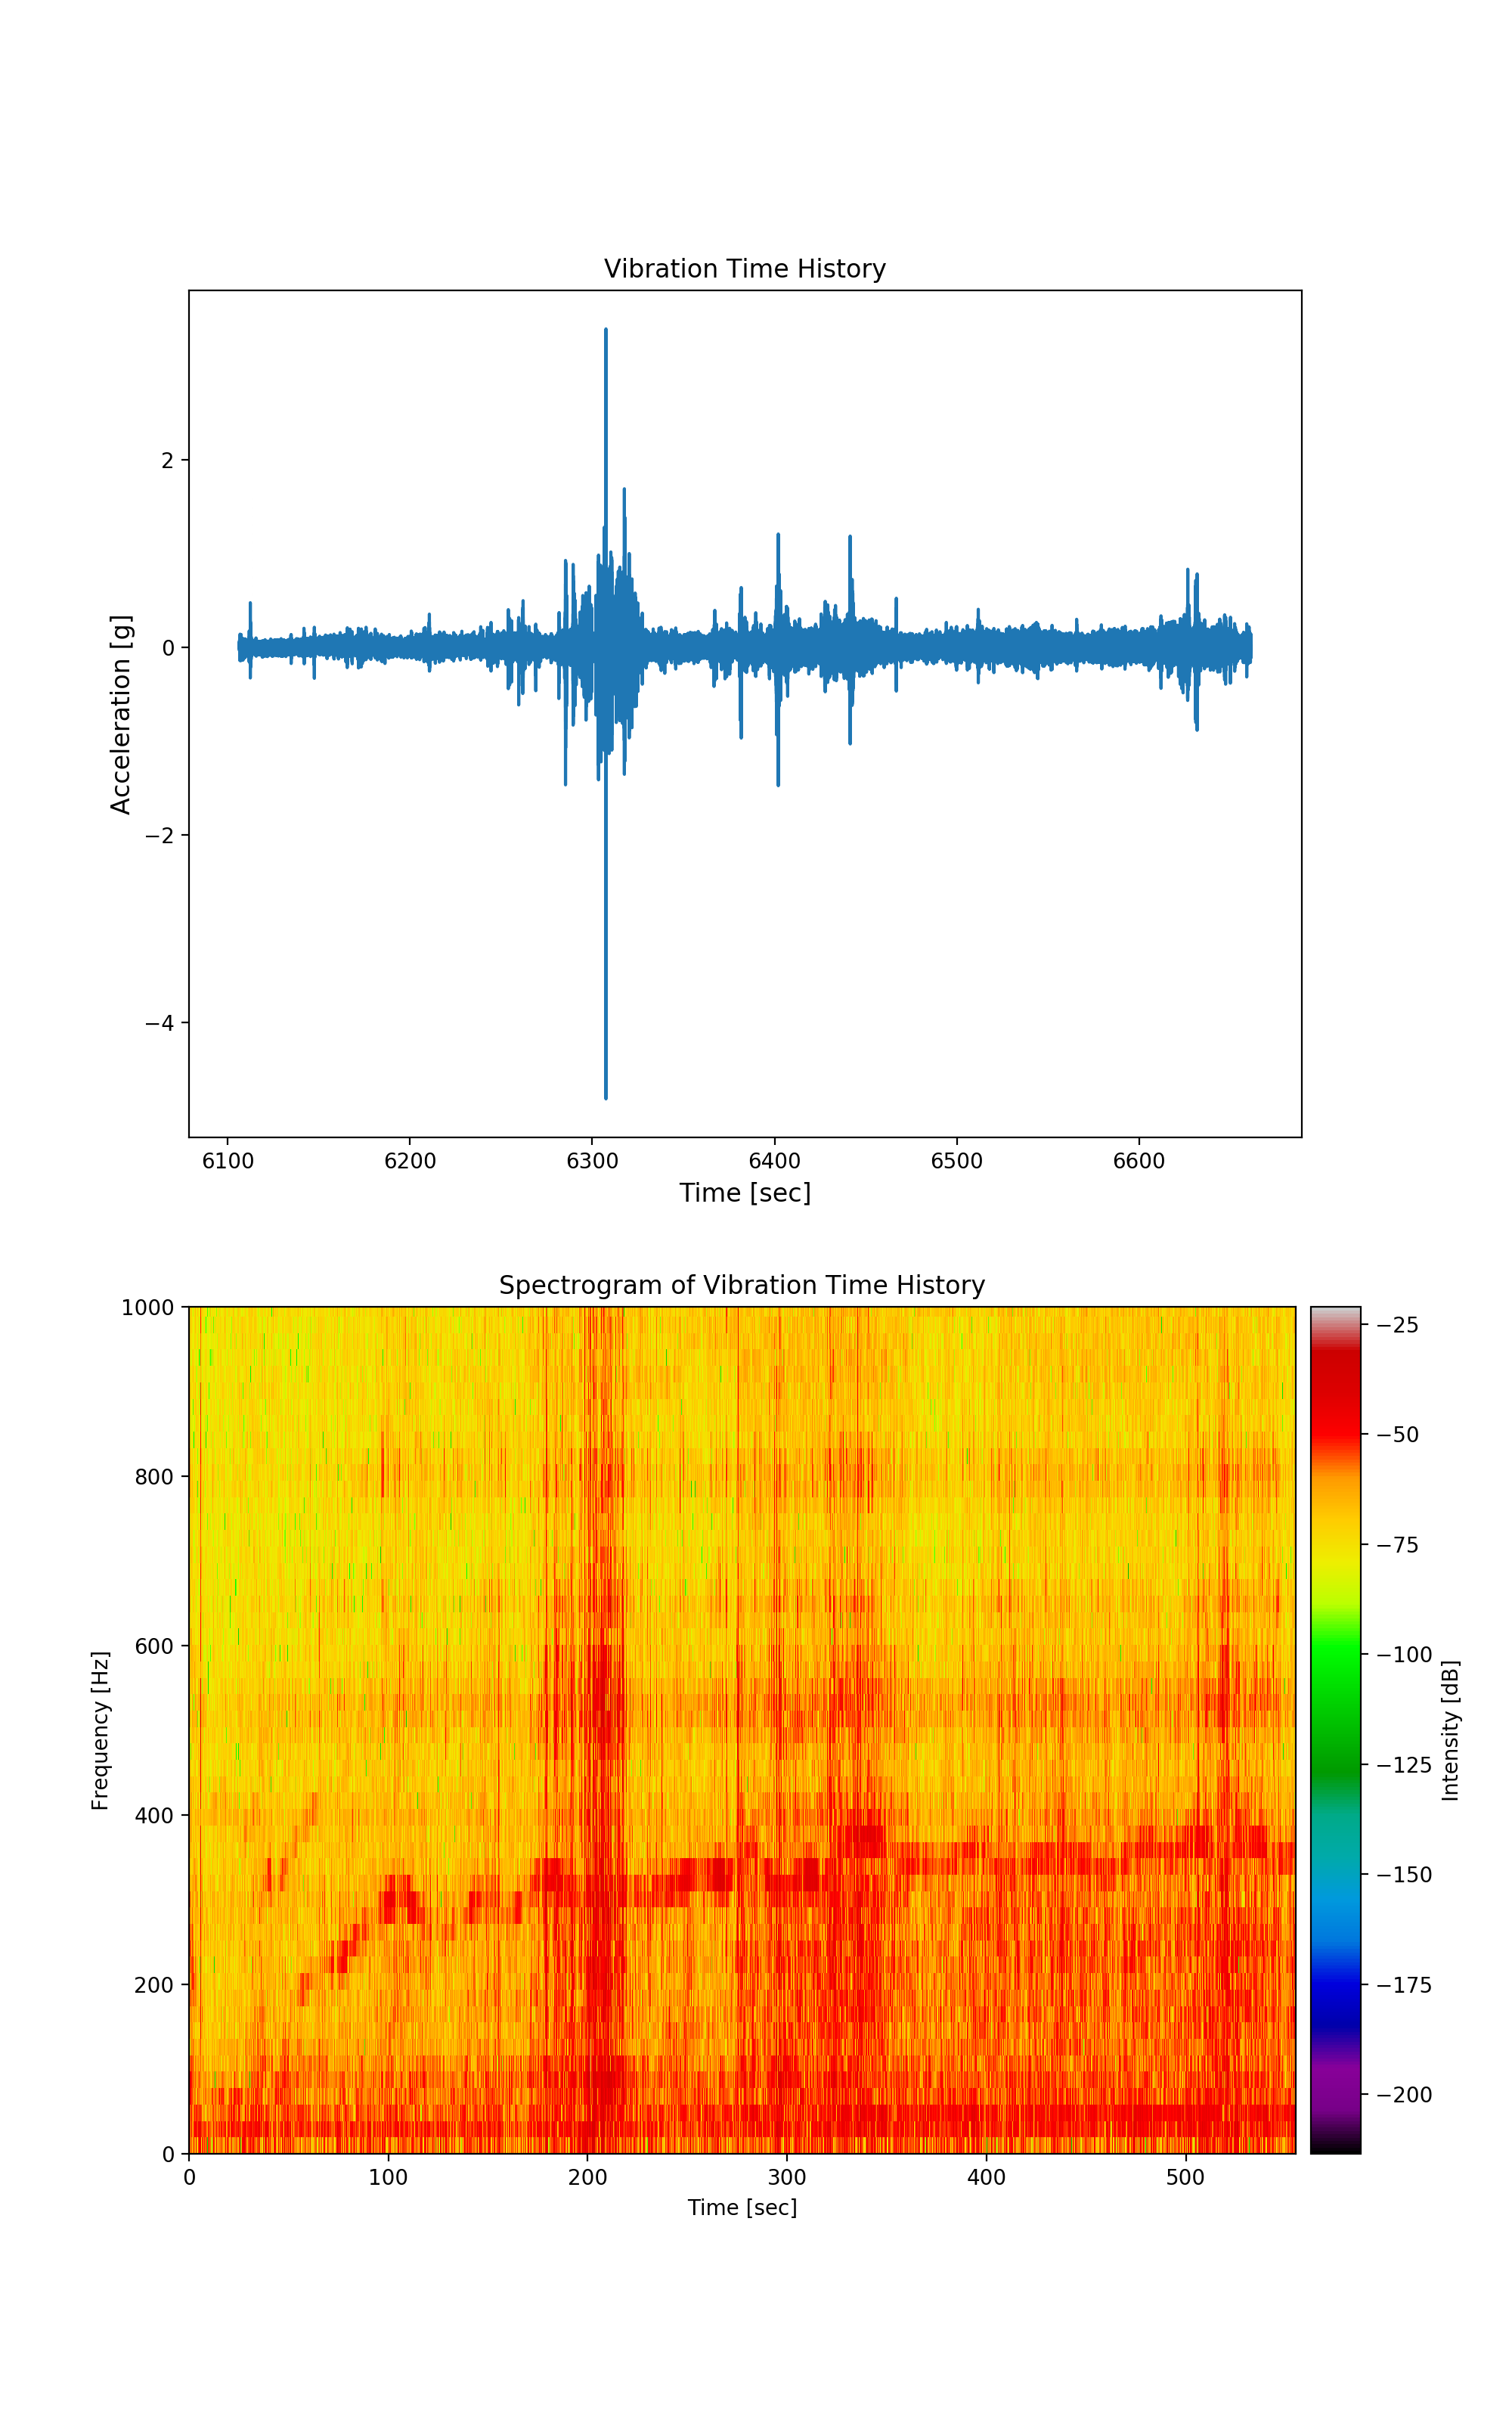

In [304]:
# Time history plot
fig = plt.figure(figsize=(10,16))

ax1 = plt.subplot2grid((2,20), (0, 0), colspan=19)
plt.plot(t, sig)
plt.title('Vibration Time History', fontsize=12)
plt.xlabel('Time [sec]', fontsize=12)
plt.ylabel('Acceleration [g]', fontsize=12)

# Spectrogram
ax2 = plt.subplot2grid((2,20), (1, 0), colspan=20)
Pxx, freqs, bins, im = plt.specgram(sig,  Fs=fs, cmap=plt.cm.spectral)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram of Vibration Time History')
plt.ylim([0, 1000])

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes("right", size="4.5%", pad=0.10)
cbar = plt.colorbar(cax = cax1)
cbar.set_label('Intensity [dB]')

plt.show()

### Image

In [294]:
from scipy import misc
from scipy import ndimage

In [147]:
img = misc.imread('../img/cosmos.jpg')

In [148]:
img.shape

(1280, 1280, 3)

<IPython.core.display.Javascript object>


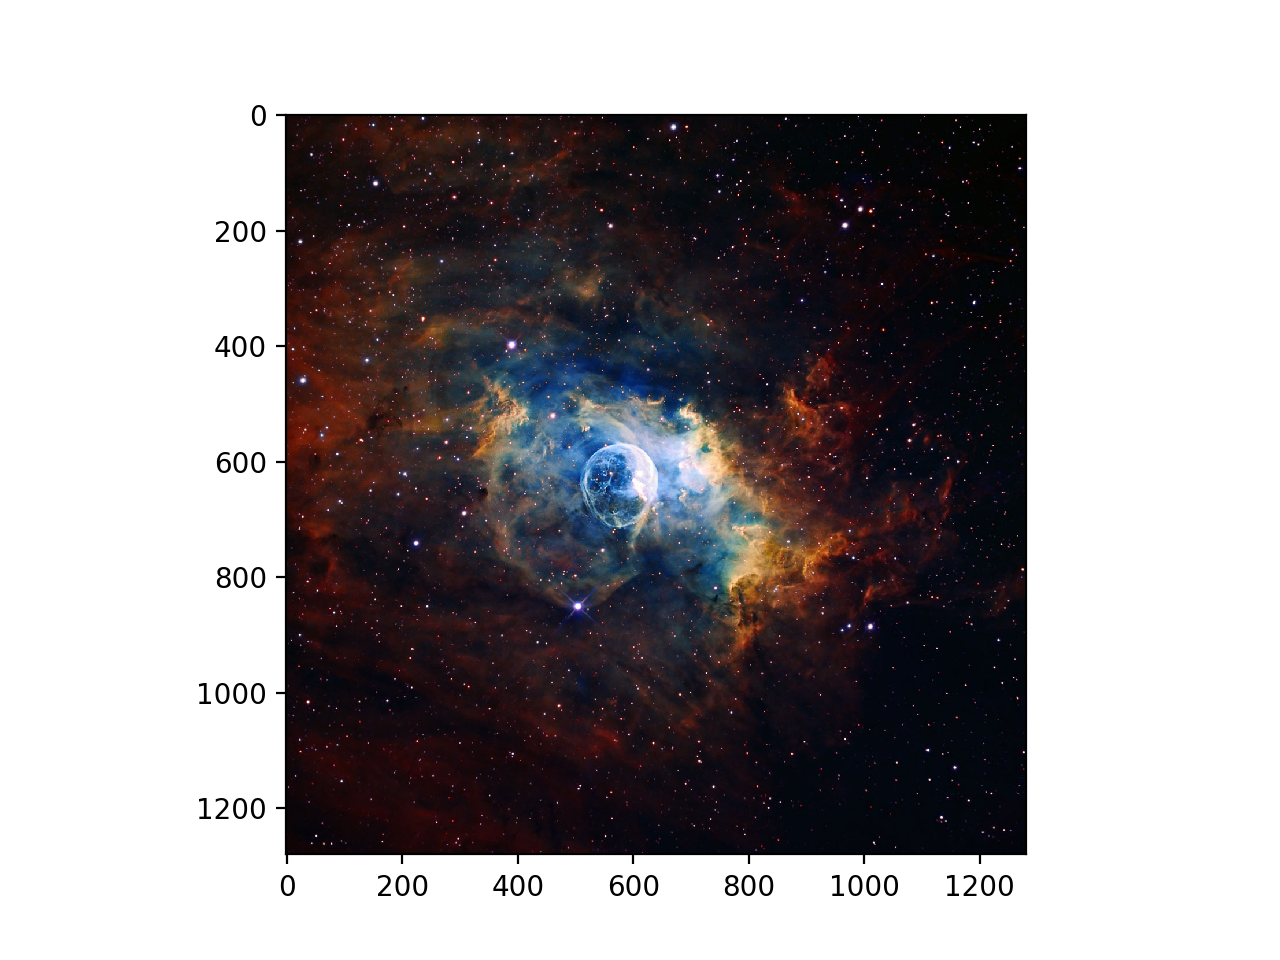

In [149]:
plt.figure()
plt.imshow(img)

In [150]:
face = misc.face(gray= True)
shifted_face = ndimage.shift(face, ( 50 , 50 ))
shifted_face2 = ndimage.shift(face, (50 , 50 ), mode ='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[ 50: -50, 50: -50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

<IPython.core.display.Javascript object>


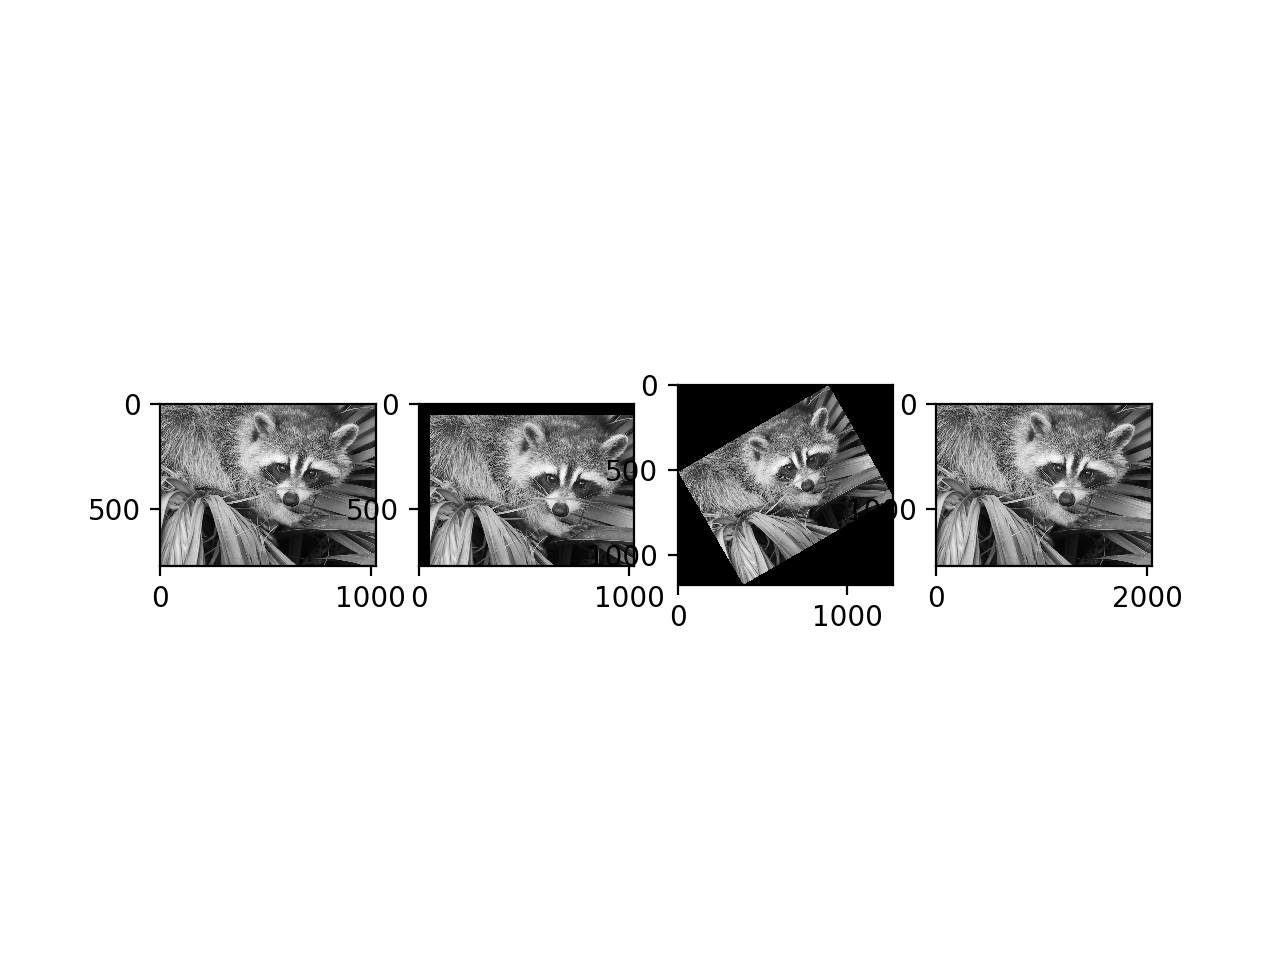

In [151]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(face, plt.cm.gray)
plt.subplot(1,4,2)
plt.imshow(shifted_face, plt.cm.gray)
plt.subplot(1,4,3)
plt.imshow(rotated_face, plt.cm.gray)
plt.subplot(1,4,4)
plt.imshow(zoomed_face, plt.cm.gray)

In [152]:
from scipy import misc
face = misc.face(gray= True)
face = face[:512, -512:] # crop out square on right
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma= 3)
median_face = ndimage.median_filter(noisy_face, size= 5)

from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5 ))

<IPython.core.display.Javascript object>


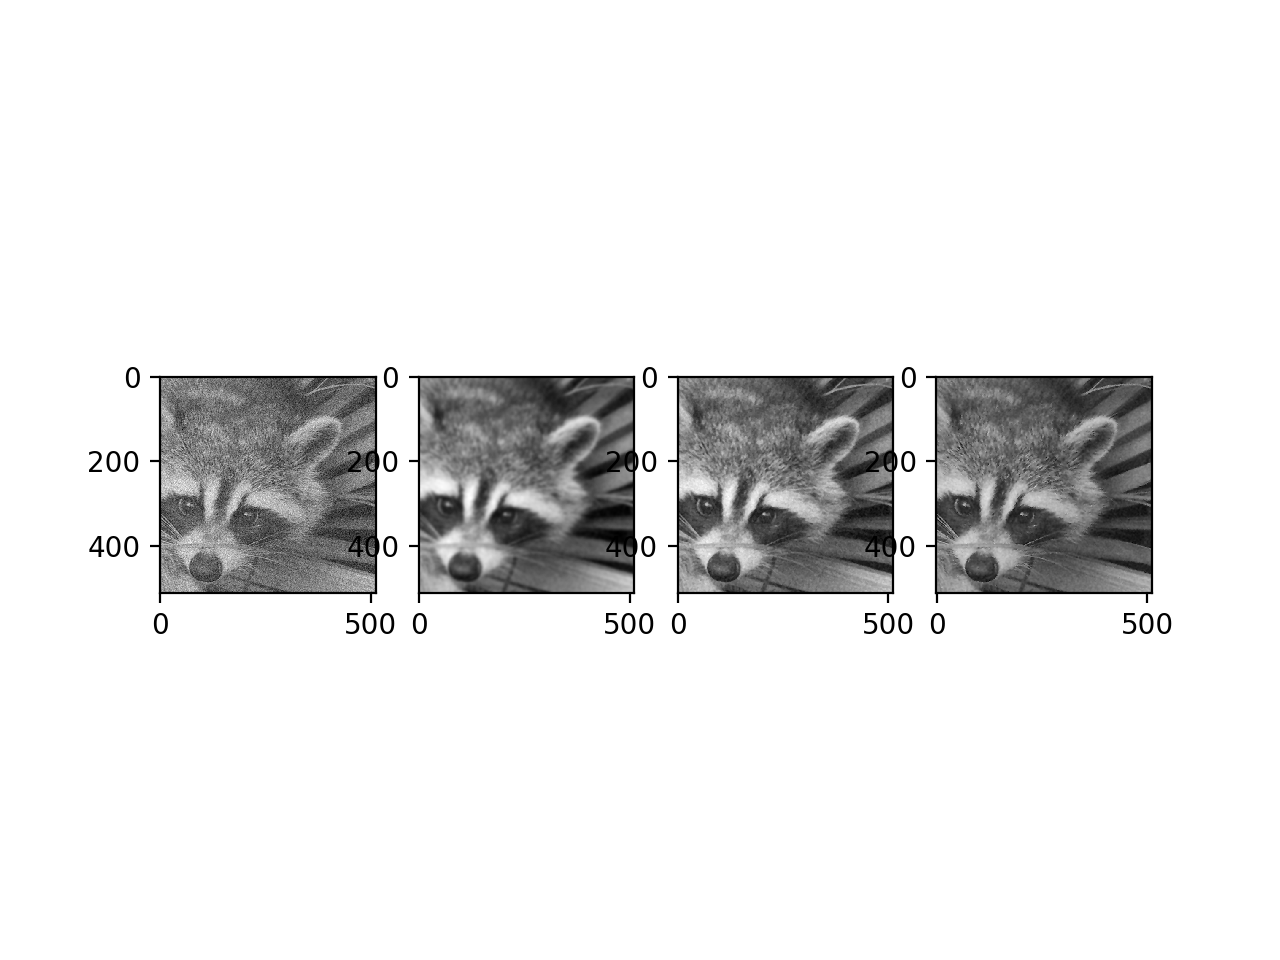

In [153]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(noisy_face, plt.cm.gray)
plt.subplot(1,4,2)
plt.imshow(blurred_face, plt.cm.gray)
plt.subplot(1,4,3)
plt.imshow(median_face, plt.cm.gray)
plt.subplot(1,4,4)
plt.imshow(wiener_face, plt.cm.gray)

In [154]:
x, y = np.indices((100, 100))
sig = np.sin(2 * np.pi * x / 50.) * np.sin(2 * np.pi * y / 50.) * (1 + x * y / 50. ** 2) ** 2
mask = sig > 1

In [155]:
labels, nb = ndimage. label(mask)
nb

8

In [156]:
areas = ndimage.sum(mask, labels, range( 1 , labels. max() + 1 ))

In [157]:
maxima = ndimage.maximum(sig, labels, range ( 1 , labels. max() + 1 ))

In [158]:
ndimage.find_objects(labels==4)

[(slice(30, 48, None), slice(30, 48, None))]

In [159]:
np.diag([1,2,3]).ravel().reshape((9,1)) + + np.zeros((1,9))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]])

<IPython.core.display.Javascript object>


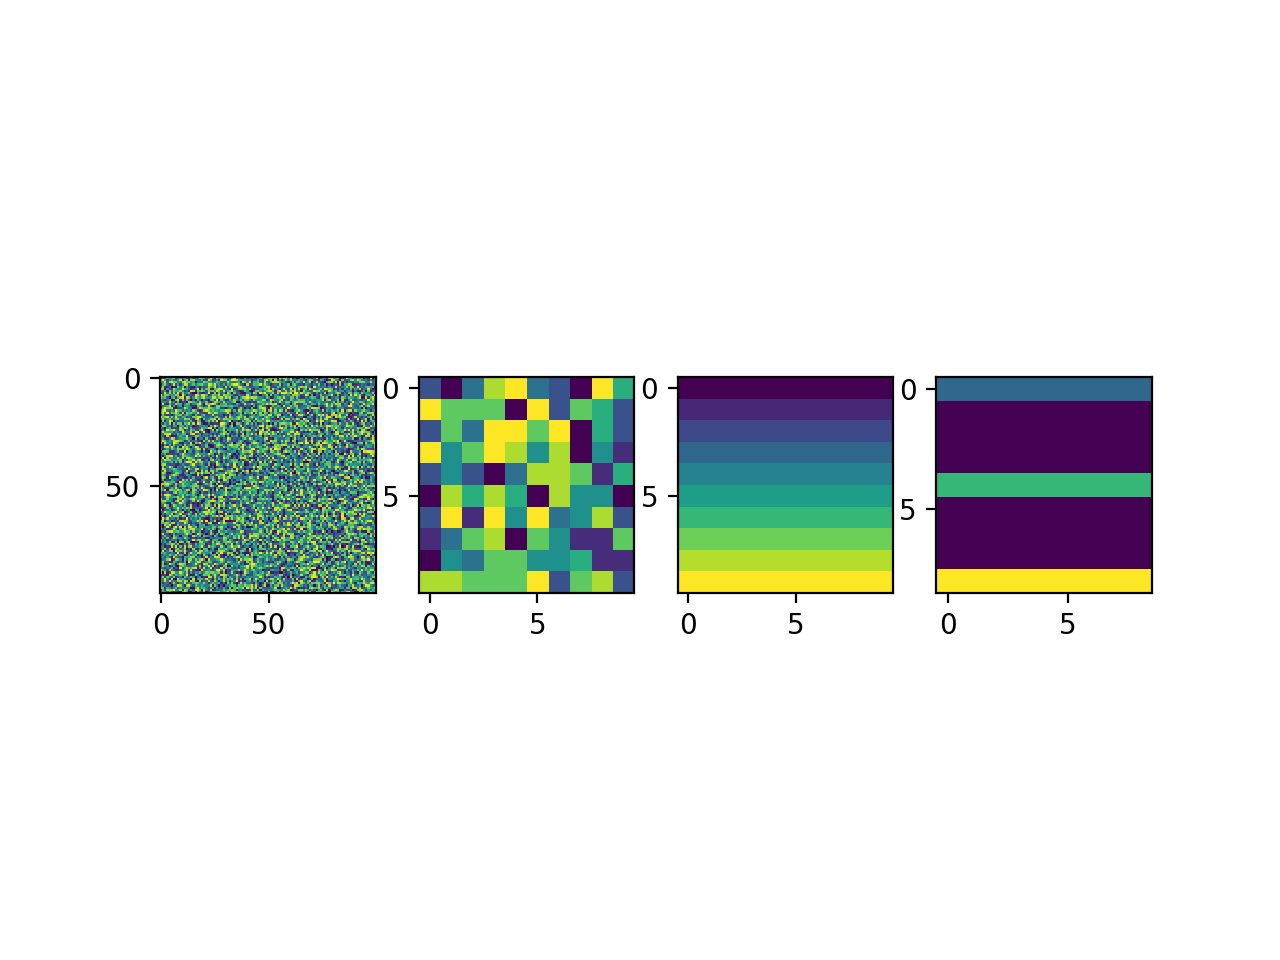

In [160]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(255*np.random.rand(100,100))
plt.subplot(1,4,2)
plt.imshow(np.random.randint(1,10,(10,10)))
plt.subplot(1,4,3)
plt.imshow(np.arange(10).reshape((10,1)) + np.zeros((1,10)))
plt.subplot(1,4,4)
plt.imshow(np.diag([1,2,3]).ravel().reshape((9,1)) + + np.zeros((1,9)))